(1) Pure linear projection (as we've discussed)

(2) Linear projection followed by refinement with a physics engine. The basic idea is that you initialize the triangle location at the linear projection hypothesis, then run a simulation to see where the ball goes. Depending on whether it's above or below the exit point, adjust the triangle up or down along the linear vertical path from the initial ball position. The parameters here would be the size of the increment and the stopping criterion (number of increments or some error threshold). It would be easier (as a start) to use a deterministic model (no noise, as in Kevin's model).

(3) We can apply the same idea as in (2) but initialize at the anchor.

(4) Same idea as (2) & (3) but the initial point is somewhere between the anchor and the linear projection. The convex combination is determined by a free parameter. We could also consider a version (based on the pilot results) where there is only a convex combination along one dimension.

[fit each model with maximum likelihood estimation]

# (1) Pure Linear Projection

I'm not sure I understand the issue. Right now all we really want is to see a **scatter plot of path projection predictions vs. human collider placements**, as a baseline to compare a more sophisticated model that uses intuitive physics.

## Test Plot Code

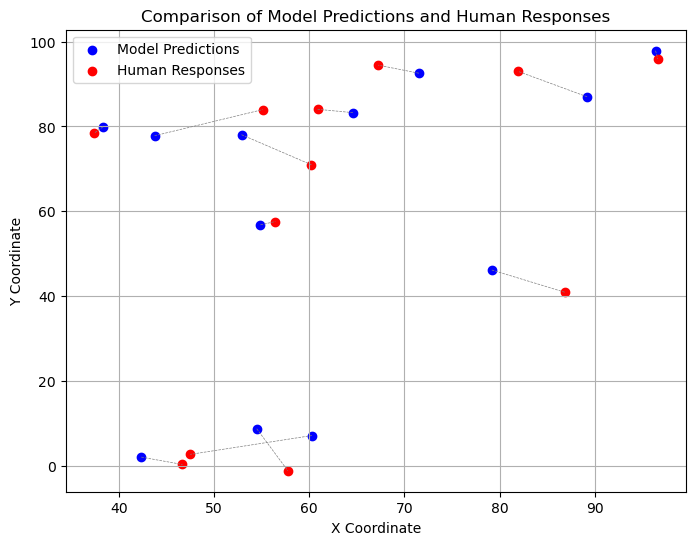

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generating fake data
np.random.seed(0)
x_model = np.random.uniform(0, 100, 12)
y_model = np.random.uniform(0, 100, 12)
x_human = x_model + np.random.normal(0, 5, 12)  # Adding some variation for human responses
y_human = y_model + np.random.normal(0, 5, 12)

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_model, y_model, color='blue', label='Model Predictions')
plt.scatter(x_human, y_human, color='red', label='Human Responses')

# Drawing lines between corresponding points
for i in range(len(x_model)):
    plt.plot([x_model[i], x_human[i]], [y_model[i], y_human[i]], color='gray', linestyle='--', linewidth=0.5)

# Adding plot details
plt.title('Comparison of Model Predictions and Human Responses')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


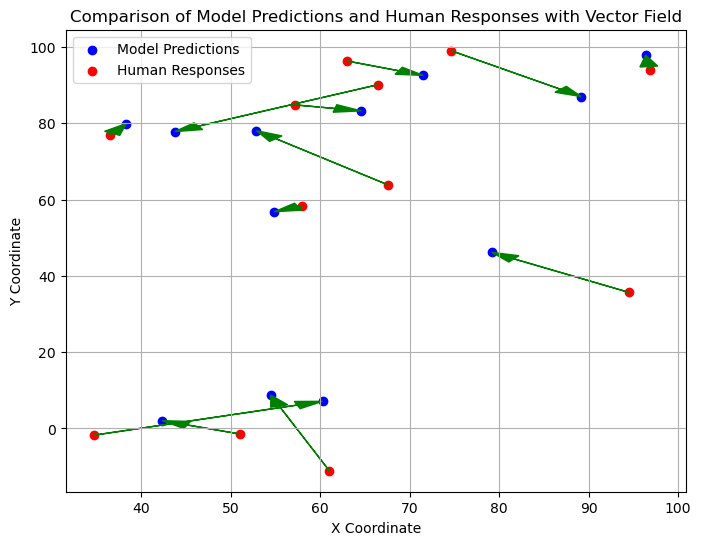

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generating fake data
np.random.seed(0)
x_model = np.random.uniform(0, 100, 12)
y_model = np.random.uniform(0, 100, 12)
x_human = x_model + np.random.normal(0, 10, 12)  # More variation for human responses
y_human = y_model + np.random.normal(0, 10, 12)

# Creating the plot
plt.figure(figsize=(8, 6))
plt.scatter(x_model, y_model, color='blue', label='Model Predictions')
plt.scatter(x_human, y_human, color='red', label='Human Responses')

# Drawing arrows from human responses to model predictions
for i in range(len(x_model)):
    plt.arrow(x_human[i], y_human[i], x_model[i] - x_human[i], y_model[i] - y_human[i], 
              head_width=2, head_length=3, fc='green', ec='green', length_includes_head=True)

# Adding plot details
plt.title('Comparison of Model Predictions and Human Responses with Vector Field')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


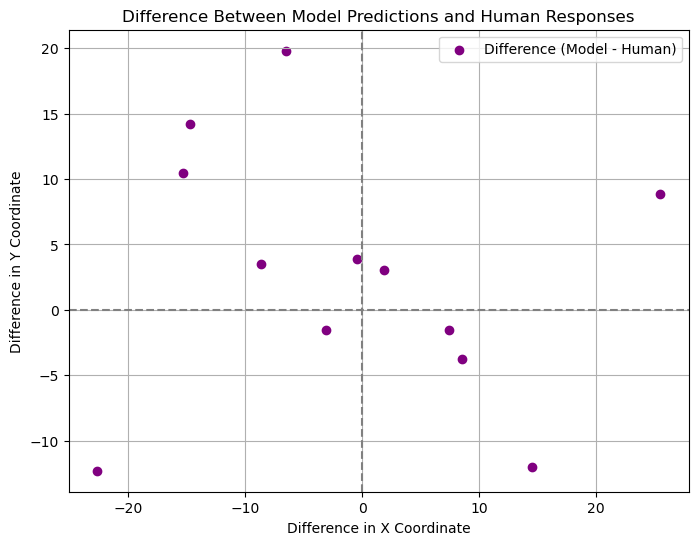

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generating fake data
np.random.seed(0)
x_model = np.random.uniform(0, 100, 12)
y_model = np.random.uniform(0, 100, 12)
x_human = x_model + np.random.normal(0, 10, 12)  # More variation for human responses
y_human = y_model + np.random.normal(0, 10, 12)

# Calculating the differences
x_diff = x_model - x_human
y_diff = y_model - y_human

# Creating the plot
plt.figure(figsize=(8, 6))
plt.scatter(x_diff, y_diff, color='purple', label='Difference (Model - Human)')

# Adding plot details
plt.title('Difference Between Model Predictions and Human Responses')
plt.xlabel('Difference in X Coordinate')
plt.ylabel('Difference in Y Coordinate')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


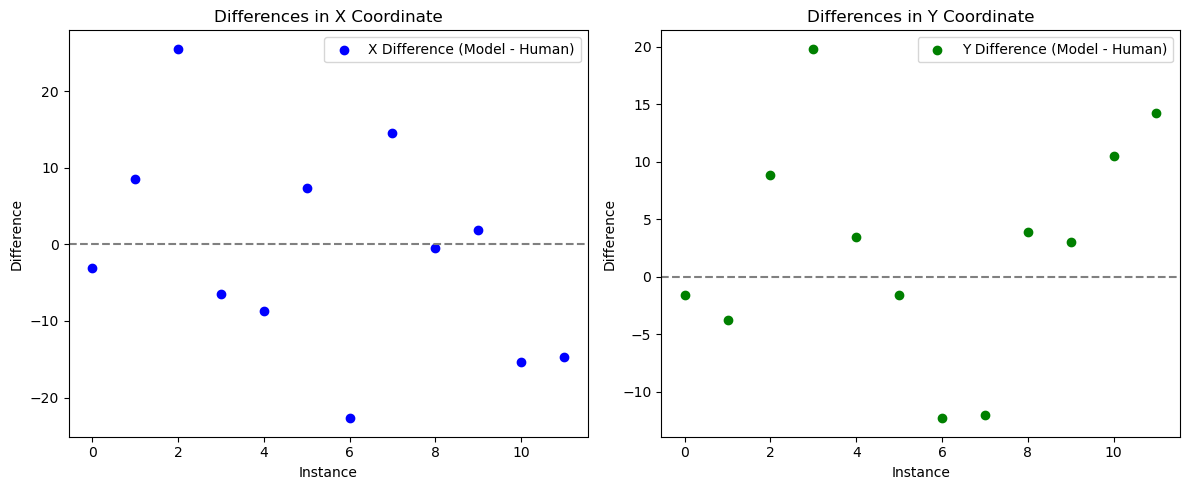

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generating fake data
np.random.seed(0)
x_model = np.random.uniform(0, 100, 12)
y_model = np.random.uniform(0, 100, 12)
x_human = x_model + np.random.normal(0, 10, 12)  # More variation for human responses
y_human = y_model + np.random.normal(0, 10, 12)

# Plotting
plt.figure(figsize=(12, 5))

# Plot for differences in X
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.scatter(range(len(x_model)), x_model - x_human, color='blue', label='X Difference (Model - Human)')
plt.axhline(0, color='grey', linestyle='--')
plt.title('Differences in X Coordinate')
plt.xlabel('Instance')
plt.ylabel('Difference')
plt.legend()

# Plot for differences in Y
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.scatter(range(len(y_model)), y_model - y_human, color='green', label='Y Difference (Model - Human)')
plt.axhline(0, color='grey', linestyle='--')
plt.title('Differences in Y Coordinate')
plt.xlabel('Instance')
plt.ylabel('Difference')
plt.legend()

plt.tight_layout()
plt.show()


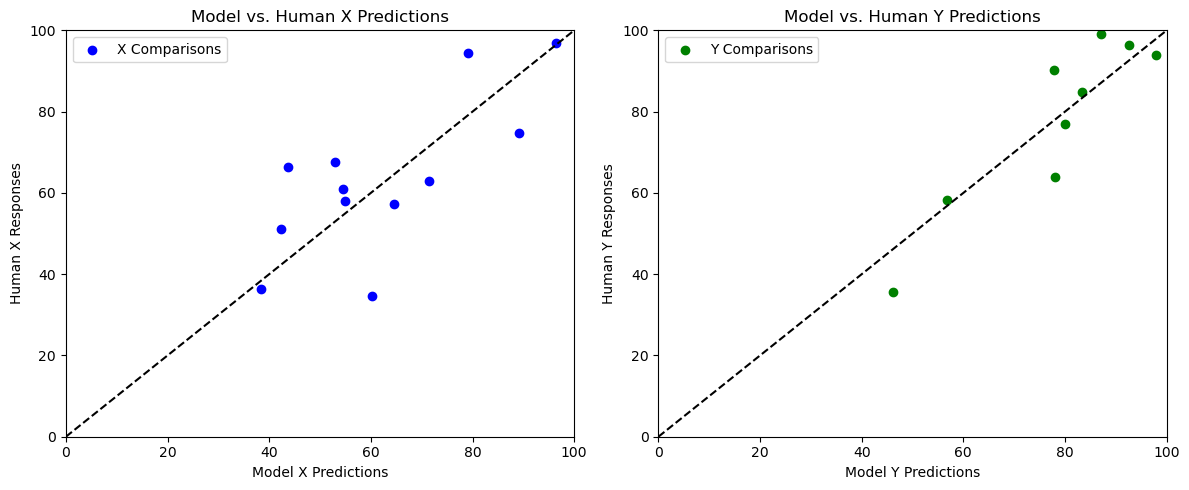

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generating fake data
np.random.seed(0)
x_model = np.random.uniform(0, 100, 12)
y_model = np.random.uniform(0, 100, 12)
x_human = x_model + np.random.normal(0, 10, 12)  # More variation for human responses
y_human = y_model + np.random.normal(0, 10, 12)

# Creating the plots
plt.figure(figsize=(12, 5))

# Plot for X comparisons
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.scatter(x_model, x_human, color='blue', label='X Comparisons')
plt.plot([0, 100], [0, 100], 'k--')  # Line y = x for reference
plt.title('Model vs. Human X Predictions')
plt.xlabel('Model X Predictions')
plt.ylabel('Human X Responses')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()

# Plot for Y comparisons
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.scatter(y_model, y_human, color='green', label='Y Comparisons')
plt.plot([0, 100], [0, 100], 'k--')  # Line y = x for reference
plt.title('Model vs. Human Y Predictions')
plt.xlabel('Model Y Predictions')
plt.ylabel('Human Y Responses')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()
plt.show()


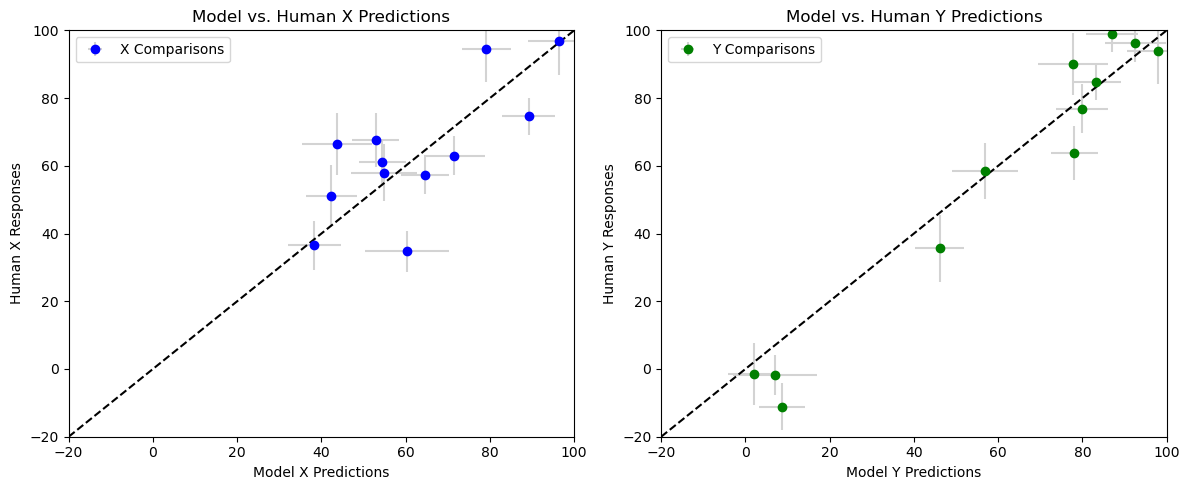

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generating fake data
np.random.seed(0)
x_model = np.random.uniform(0, 100, 12)
y_model = np.random.uniform(0, 100, 12)
x_human = x_model + np.random.normal(0, 10, 12)
y_human = y_model + np.random.normal(0, 10, 12)

# Assuming some standard deviations for model and human predictions
std_dev_model = np.random.uniform(5, 10, 12)  # Just as an example
std_dev_human = np.random.uniform(5, 10, 12)  # Just as an example

# Creating the plots with error bars
plt.figure(figsize=(12, 5))

# Plot for X comparisons with error bars
plt.subplot(1, 2, 1)
plt.errorbar(x_model, x_human, xerr=std_dev_model, yerr=std_dev_human, fmt='o', color='blue', ecolor='lightgray', label='X Comparisons')
plt.plot([-20, 100], [-20, 100], 'k--')
plt.title('Model vs. Human X Predictions')
plt.xlabel('Model X Predictions')
plt.ylabel('Human X Responses')
plt.xlim(-20, 100)
plt.ylim(-20, 100)
plt.legend()

# Plot for Y comparisons with error bars
plt.subplot(1, 2, 2)
plt.errorbar(y_model, y_human, xerr=std_dev_model, yerr=std_dev_human, fmt='o', color='green', ecolor='lightgray', label='Y Comparisons')
plt.plot([-20, 100], [-20, 100], 'k--')
plt.title('Model vs. Human Y Predictions')
plt.xlabel('Model Y Predictions')
plt.ylabel('Human Y Responses')
plt.xlim(-20, 100)
plt.ylim(-20, 100)
plt.legend()

plt.tight_layout()
plt.show()


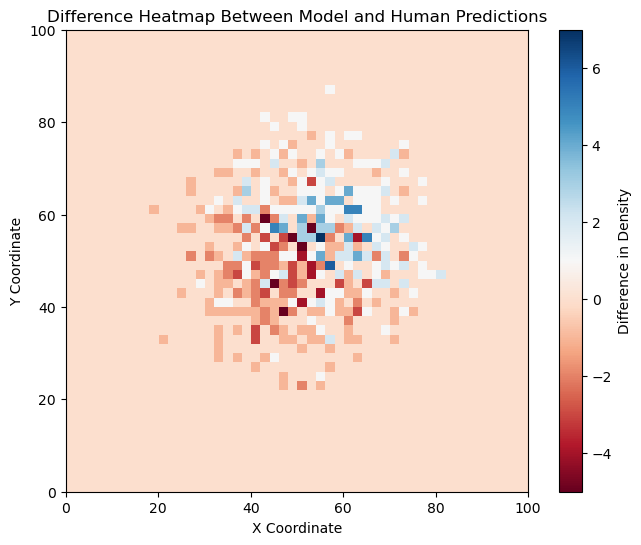

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data for demonstration
np.random.seed(0)
x_model = np.random.normal(50, 10, 500)
y_model = np.random.normal(50, 10, 500)
x_human = np.random.normal(55, 10, 500)
y_human = np.random.normal(55, 10, 500)

# Function to calculate density
def calc_density(x, y):
    return np.histogram2d(x, y, bins=50, range=[[0, 100], [0, 100]])[0]

# Calculate densities
density_model = calc_density(x_model, y_model)
density_human = calc_density(x_human, y_human)

# Calculate difference in densities
density_diff = density_human - density_model

# Creating a heatmap for the difference
plt.figure(figsize=(8, 6))
plt.imshow(density_diff, extent=[0, 100, 0, 100], origin='lower', cmap='RdBu')
plt.colorbar(label='Difference in Density')
plt.title('Difference Heatmap Between Model and Human Predictions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


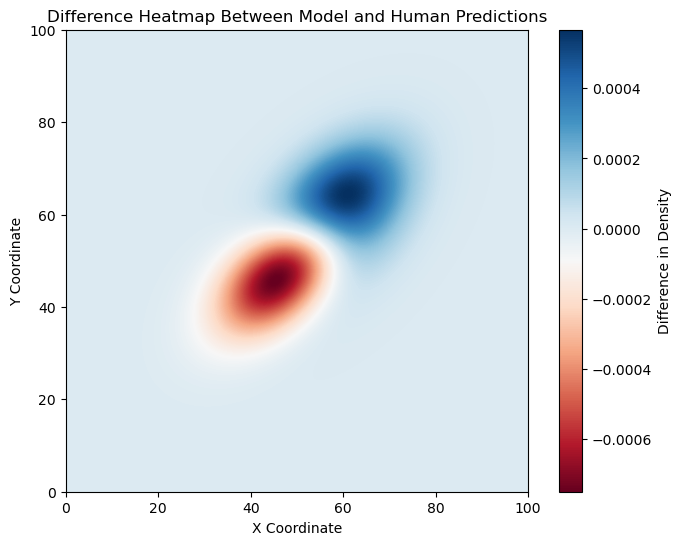

In [12]:
import numpy as np

# Example data (replace with your actual data)
x_model, y_model = np.random.multivariate_normal([50, 50], [[100, 50], [50, 100]], 500).T
x_human, y_human = np.random.multivariate_normal([55, 55], [[100, 50], [50, 100]], 500).T

# Estimating parameters for the model data
mean_model = np.mean([x_model, y_model], axis=1)
cov_model = np.cov(x_model, y_model)

# Estimating parameters for the human data
mean_human = np.mean([x_human, y_human], axis=1)
cov_human = np.cov(x_human, y_human)

from scipy.stats import multivariate_normal

# Create a grid of x and y values
x = np.linspace(0, 100, 500)
y = np.linspace(0, 100, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Create 2D Gaussian distributions
rv_model = multivariate_normal(mean_model, cov_model)
rv_human = multivariate_normal(mean_human, cov_human)

# Calculate the density values
density_model = rv_model.pdf(pos)
density_human = rv_human.pdf(pos)

import matplotlib.pyplot as plt

# Calculate difference in densities
density_diff = density_human - density_model

# Creating a heatmap for the difference
plt.figure(figsize=(8, 6))
plt.imshow(density_diff, extent=[0, 100, 0, 100], origin='lower', cmap='RdBu')
plt.colorbar(label='Difference in Density')
plt.title('Difference Heatmap Between Model and Human Predictions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


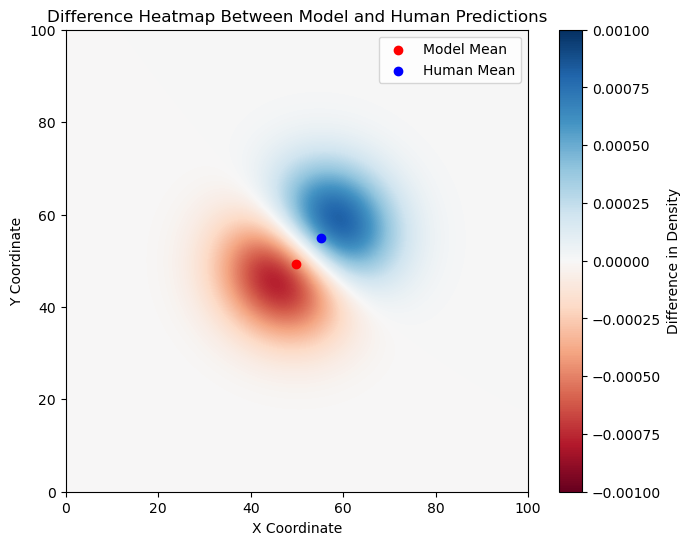

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate synthetic data (replace with your actual data)
np.random.seed(0)
x_model = np.random.normal(50, 10, 500)
y_model = np.random.normal(50, 10, 500)
x_human = np.random.normal(55, 10, 500)
y_human = np.random.normal(55, 10, 500)

# Estimate parameters
mean_model = np.mean([x_model, y_model], axis=1)
cov_model = np.cov(x_model, y_model)

mean_human = np.mean([x_human, y_human], axis=1)
cov_human = np.cov(x_human, y_human)

# Create a grid of x and y values
x = np.linspace(0, 100, 500)
y = np.linspace(0, 100, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Create 2D Gaussian distributions
rv_model = multivariate_normal(mean_model, cov_model)
rv_human = multivariate_normal(mean_human, cov_human)

# Calculate the density values
density_model = rv_model.pdf(pos)
density_human = rv_human.pdf(pos)

# Calculate difference in densities
density_diff = density_human - density_model

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(density_diff, extent=[0, 100, 0, 100], origin='lower', cmap='RdBu', clim=(-0.001, 0.001))
plt.colorbar(label='Difference in Density')

# Add points for means
plt.scatter(*mean_model, color='red', label='Model Mean')
plt.scatter(*mean_human, color='blue', label='Human Mean')

# Adding plot details
plt.title('Difference Heatmap Between Model and Human Predictions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


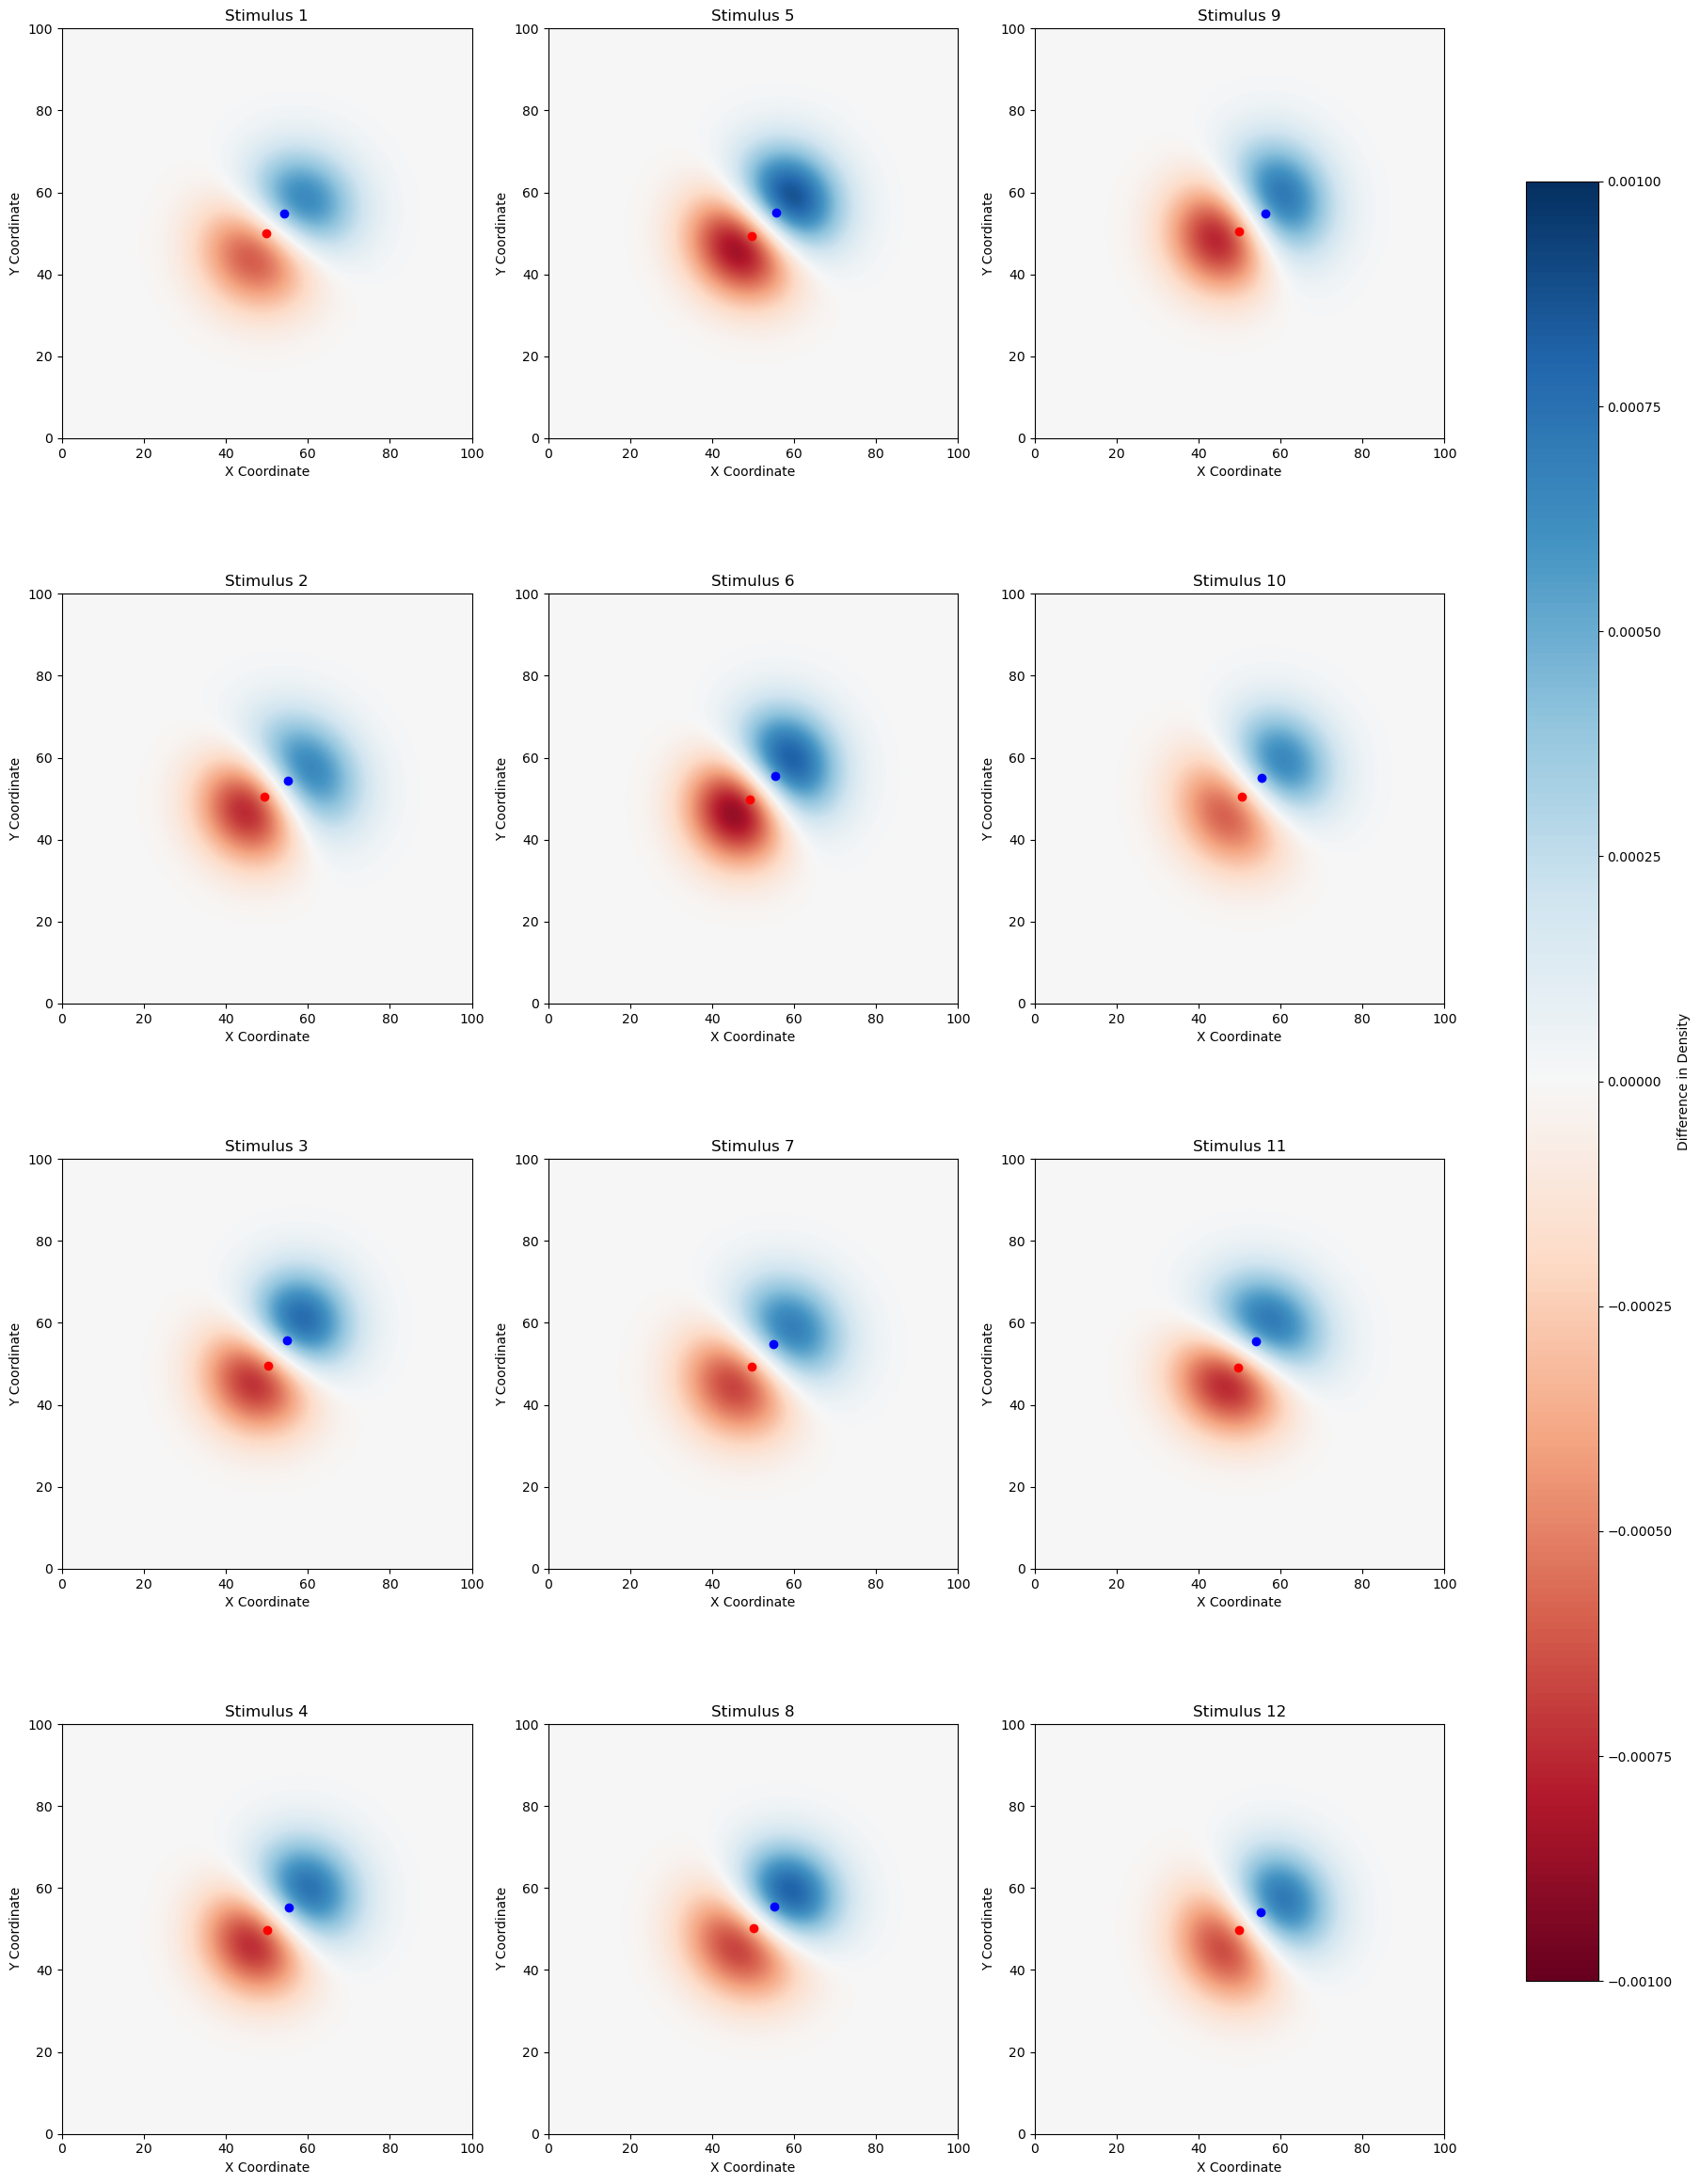

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd

# Example data generation (replace with your actual data)
np.random.seed(0)
data = pd.DataFrame({
    'x_model': np.random.normal(50, 10, 6000),
    'y_model': np.random.normal(50, 10, 6000),
    'x_human': np.random.normal(55, 10, 6000),
    'y_human': np.random.normal(55, 10, 6000),
    'stimulus_idx': np.repeat(np.arange(1, 13), 500)  # 12 unique stimulus indexes
})

# Creating 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 24), constrained_layout=True)
positions = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

positions = positions.reshape((3, 4)).T.flatten()

for index, position in enumerate(positions):
    ax = axes.flatten()[index]  # Select the current Axes object
    # Filter data for each stimulus_idx
    subset = data[data['stimulus_idx'] == position]

    # Estimate parameters for the current subset
    mean_model = np.mean([subset['x_model'], subset['y_model']], axis=1)
    cov_model = np.cov(subset['x_model'], subset['y_model'])
    mean_human = np.mean([subset['x_human'], subset['y_human']], axis=1)
    cov_human = np.cov(subset['x_human'], subset['y_human'])

    # Create 2D Gaussian distributions
    rv_model = multivariate_normal(mean_model, cov_model)
    rv_human = multivariate_normal(mean_human, cov_human)

    # Create a grid of x and y values
    x = np.linspace(0, 100, 500)
    y = np.linspace(0, 100, 500)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Calculate the density values
    density_model = rv_model.pdf(pos)
    density_human = rv_human.pdf(pos)

    # Calculate difference in densities
    density_diff = density_human - density_model

    # Plotting in the current subplot
    cax = ax.imshow(density_diff, extent=[0, 100, 0, 100], origin='lower', cmap='RdBu', clim=(-0.001, 0.001))
    ax.scatter(*mean_model, color='red', label='Model Mean')
    ax.scatter(*mean_human, color='blue', label='Human Mean')
    ax.set_title(f'Stimulus {position}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')

# Adding a colorbar
fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.8, aspect=25, label='Difference in Density')

plt.show()



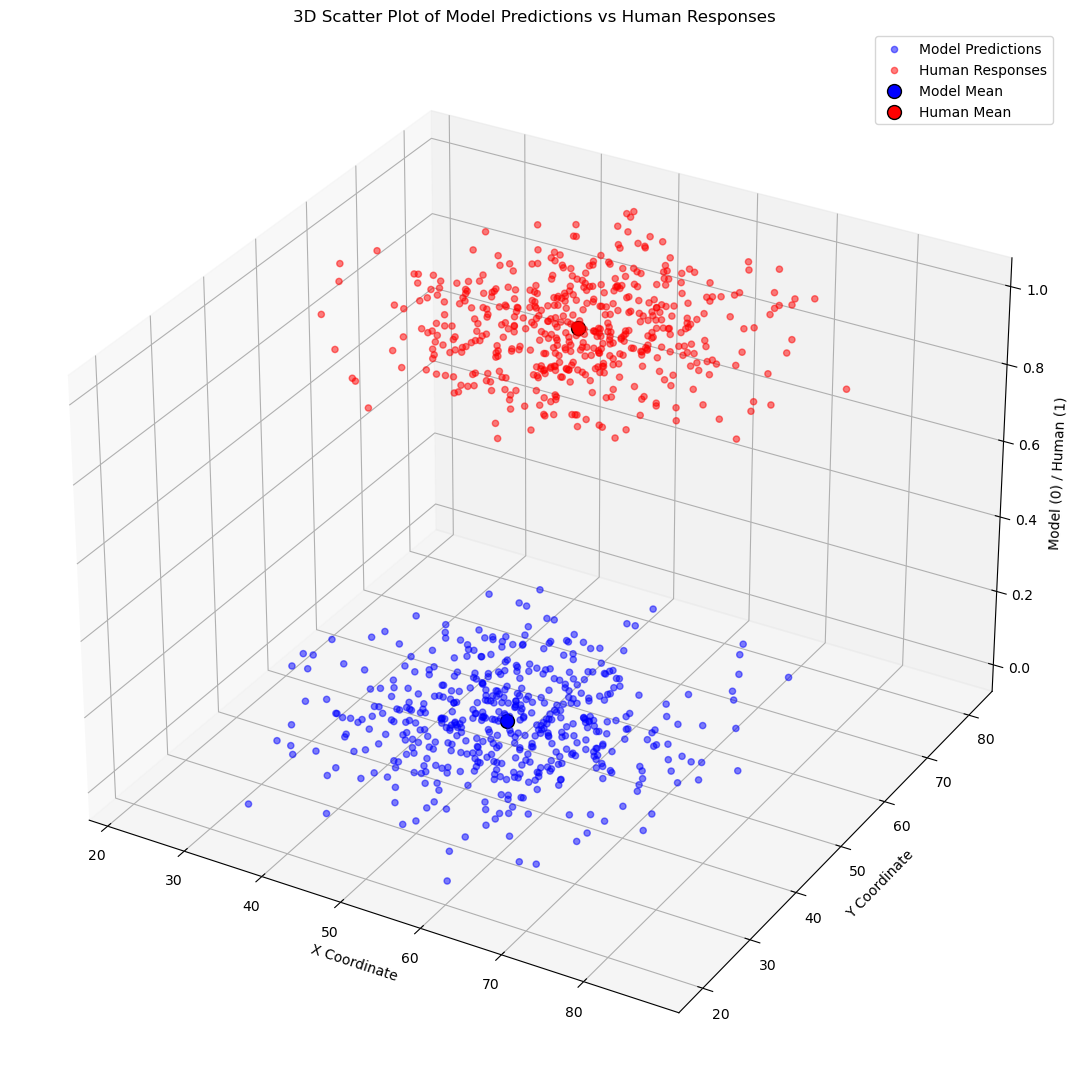

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data (replace with your actual data)
np.random.seed(0)
x_model = np.random.normal(50, 10, 500)
y_model = np.random.normal(50, 10, 500)
x_human = np.random.normal(55, 10, 500)
y_human = np.random.normal(55, 10, 500)

# Estimate the means
mean_model = np.mean([x_model, y_model], axis=1)
mean_human = np.mean([x_human, y_human], axis=1)

# Creating the 3D scatter plot
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for model predictions
ax.scatter(x_model, y_model, zs=0, zdir='z', alpha=0.5, color='blue', label='Model Predictions')

# Scatter plot for human responses
ax.scatter(x_human, y_human, zs=1, zdir='z', alpha=0.5, color='red', label='Human Responses')

# Plot the means
ax.scatter(*mean_model, 0, color='blue', s=100, edgecolor='k', label='Model Mean')
ax.scatter(*mean_human, 1, color='red', s=100, edgecolor='k', label='Human Mean')

# Adding plot details
ax.set_title('3D Scatter Plot of Model Predictions vs Human Responses')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Model (0) / Human (1)')
ax.legend()
plt.tight_layout()

plt.show()


## Load Dataset

In [114]:
import pandas as pd
import statsmodels.api as sm
import os
import json
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.linear_model import LinearRegression
from scipy.stats import binned_statistic_2d
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import hsv
from shapely.geometry import Point, LineString
import pybrms
from similaritymeasures import frechet_dist
canvasWidth = 1000 

In [116]:
def string2List(dataString):
    dataList = ast.literal_eval(dataString)
    return dataList

In [117]:
# Load data from the cleaned_df_with_single_groundTruth_Trajectories
df_all_single_filename = '../Data Analysis/evaluateResponses_trajectory/df_all_with_single_ground_trajectory_pilot_v1.csv'
df_all_single = pd.read_csv(df_all_single_filename)
df_all_single['exact_path_single'] = df_all_single['exact_path_single'].apply(string2List)

# Load the dataset with participants' simulated paths
df_all_trajectory = '../Data Analysis/evaluateResponses_trajectory/cleaned_file_pilot_v1_all_simulated_trajectory.csv'
participant_trajectories = pd.read_csv(df_all_trajectory)
participant_trajectories['simulated_path'] = participant_trajectories['simulated_path'].apply(string2List)

allData = pd.merge(df_all_single, participant_trajectories, on=['subject_id', 'stimulus_idx', 'obstacle_idx'], how='left')

In [118]:
allData

participant_ID  currentTrial                subject_id  \
0     60fdb8ef572006d42ee49b20_result           1.0  60fdb8ef572006d42ee49b20   
1     60fdb8ef572006d42ee49b20_result           2.0  60fdb8ef572006d42ee49b20   
2     60fdb8ef572006d42ee49b20_result           3.0  60fdb8ef572006d42ee49b20   
3     60fdb8ef572006d42ee49b20_result           4.0  60fdb8ef572006d42ee49b20   
4     60fdb8ef572006d42ee49b20_result           5.0  60fdb8ef572006d42ee49b20   
...                               ...           ...                       ...   
1435  5ec75df0d799ae1c11a8115c_result          68.0  5ec75df0d799ae1c11a8115c   
1436  5ec75df0d799ae1c11a8115c_result          69.0  5ec75df0d799ae1c11a8115c   
1437  5ec75df0d799ae1c11a8115c_result          70.0  5ec75df0d799ae1c11a8115c   
1438  5ec75df0d799ae1c11a8115c_result          71.0  5ec75df0d799ae1c11a8115c   
1439  5ec75df0d799ae1c11a8115c_result          72.0  5ec75df0d799ae1c11a8115c   

                      study_id                session_id  trial_index_x  \
0     6509bb9f610e9a3075ec3f2e  650e0cef2fa669e369cb8f10             29   
1     6509bb9f610e9a3075ec3f2e  650e0cef2fa669e369cb8f10             31   
2     6509bb9f610e9a3075ec3f2e  650e0cef2fa669e369cb8f10             33   
3     6509bb9f610e9a3075ec3f2e  650e0cef2fa669e369cb8f10             35   
4     6509bb9f610e9a3075ec3f2e  650e0cef2fa669e369cb8f10             37   
...                        ...                       ...            ...   
1435  6509bb9f610e9a3075ec3f2e  650e0f52a698077237c86766            155   
1436  6509bb9f610e9a3075ec3f2e  650e0f52a698077237c86766            157   
1437  6509bb9f610e9a3075ec3f2e  650e0f52a698077237c86766            159   
1438  6509bb9f610e9a3075ec3f2e  650e0f52a698077237c86766            161   
1439  6509bb9f610e9a3075ec3f2e  650e0f52a698077237c86766            163   

     trial_name  flipped  ball_X  triangle_final_x  ...  obstacle_initial_y  \
0     fallScene    False   500.0        497.000000  ...               350.0   
1     fallScene    False   322.3        360.000002  ...               350.0   
2     fallScene    False   322.3        378.010000  ...               250.0   
3     fallScene    False   500.0        489.010000  ...               250.0   
4     fallScene     True   322.3        650.999930  ...               350.0   
...         ...      ...     ...               ...  ...                 ...   
1435  fallScene     True   500.0        527.000000  ...               250.0   
1436  fallScene     True   500.0        537.994224  ...               350.0   
1437  fallScene     True   500.0        474.000007  ...               350.0   
1438  fallScene     True   604.4        455.010000  ...               250.0   
1439  fallScene    False   500.0        539.992965  ...               350.0   

      runnerFPS  ball_X_final  obstacle_groundTruth_x_final  \
0     60.000000         500.0                    479.921143   
1     60.000000         322.3                    379.371143   
2     60.000000         322.3                    379.371143   
3     60.000000         500.0                    453.671143   
4     60.000000         677.7                    643.578857   
...         ...           ...                           ...   
1435  60.007740         500.0                    546.328857   
1436  62.011746         500.0                    546.328857   
1437  60.016380         500.0                    446.528857   
1438  62.016626         395.6                    403.128857   
1439  60.013740         500.0                    510.871143   

      obstacle_initial_x_final  triangle_final_x_flipback  \
0                        500.0                 497.000000   
1                        375.0                 360.000002   
2                        500.0                 378.010000   
3                        500.0                 489.010000   
4                        375.0                 349.000070   
...                        ...                        ...   
1435            

## Add fd_metric to the dataframe

In [119]:
segmented_line = [((250, 150), (250, 450)), ((250, 450), (750, 450)), ((750, 450), (750, 150))]
top_y = 150
bottom_y = 450
left_x = 150
right_x = 750
ball_radius = 30

In [120]:
# select all points that are outside of the screen
# return list1, list2
# list1: list of points that form the path before the ball enters the screen (when ball_y <= top_y + ball_radius)
# list2: list of points that form the path before the ball exits the screen (when ball_y >= bottom_y - ball_radius or ball_x <= left_x + ball_radius or ball_x >= right_x - ball_radius)
def pickPointsOutScreen(path, top_y, bottom_y, left_x, right_x, ball_radius, keepSpeed = False):
    list1 = []
    list2 = []
    for ball_x,ball_y,speed in path:
        if ball_y <= top_y + ball_radius:
            if keepSpeed:
                list1.append((ball_x,ball_y,speed))
            else:
                list1.append((ball_x,ball_y))
        if (ball_y >= bottom_y - ball_radius) or (ball_x <= left_x + ball_radius) or (ball_x >= right_x - ball_radius):
            if keepSpeed:
                list2.append((ball_x,ball_y,speed))
            else:
                list2.append((ball_x,ball_y))
    return list1, list2

# calculate Fréchet distance between list1_participant and list1_groundTruth (fd1) and list2_participant and list2_groundTruth (fd2)
# return fd1, fd2
def evaluateResponseByFD(rowData):
    simulatedPath = rowData['simulated_path']
    exactPath = rowData['exact_path_single']
    l1_p, l2_p = pickPointsOutScreen(simulatedPath, top_y, bottom_y, left_x, right_x, ball_radius)
    l1_g, l2_g = pickPointsOutScreen(exactPath, top_y, bottom_y, left_x, right_x, ball_radius)
    fd1 = frechet_dist(l1_p, l1_g)
#     print('obstacle_idx')
#     print(rowData['obstacle_idx'])
#     print('fd1:')
#     print(fd1)
    fd2 = frechet_dist(l2_p, l2_g)
#     print('fd2:')
#     print(fd2)
#     print('')
    return fd1, fd2

In [121]:
## generate Fréchet distance for all rows in the dataframe

# Apply the function to each row
result_series = allData.apply(evaluateResponseByFD, axis=1)

# Convert the resulting series of tuples into a DataFrame
result_df = result_series.apply(pd.Series)

# Rename the columns of the result DataFrame
result_df.columns = ['fd1_enter', 'fd2_exit']

# Join the result DataFrame back to your original DataFrame
df_all_updated = allData.join(result_df)

In [122]:
allData = df_all_updated
# df_all_updated.to_csv('df_all_with_single_ground_trajectory_simulation_fd_pilot_v1.csv', index=False)

In [123]:
allData

participant_ID  currentTrial                subject_id  \
0     60fdb8ef572006d42ee49b20_result           1.0  60fdb8ef572006d42ee49b20   
1     60fdb8ef572006d42ee49b20_result           2.0  60fdb8ef572006d42ee49b20   
2     60fdb8ef572006d42ee49b20_result           3.0  60fdb8ef572006d42ee49b20   
3     60fdb8ef572006d42ee49b20_result           4.0  60fdb8ef572006d42ee49b20   
4     60fdb8ef572006d42ee49b20_result           5.0  60fdb8ef572006d42ee49b20   
...                               ...           ...                       ...   
1435  5ec75df0d799ae1c11a8115c_result          68.0  5ec75df0d799ae1c11a8115c   
1436  5ec75df0d799ae1c11a8115c_result          69.0  5ec75df0d799ae1c11a8115c   
1437  5ec75df0d799ae1c11a8115c_result          70.0  5ec75df0d799ae1c11a8115c   
1438  5ec75df0d799ae1c11a8115c_result          71.0  5ec75df0d799ae1c11a8115c   
1439  5ec75df0d799ae1c11a8115c_result          72.0  5ec75df0d799ae1c11a8115c   

                      study_id                session_id  trial_index_x  \
0     6509bb9f610e9a3075ec3f2e  650e0cef2fa669e369cb8f10             29   
1     6509bb9f610e9a3075ec3f2e  650e0cef2fa669e369cb8f10             31   
2     6509bb9f610e9a3075ec3f2e  650e0cef2fa669e369cb8f10             33   
3     6509bb9f610e9a3075ec3f2e  650e0cef2fa669e369cb8f10             35   
4     6509bb9f610e9a3075ec3f2e  650e0cef2fa669e369cb8f10             37   
...                        ...                       ...            ...   
1435  6509bb9f610e9a3075ec3f2e  650e0f52a698077237c86766            155   
1436  6509bb9f610e9a3075ec3f2e  650e0f52a698077237c86766            157   
1437  6509bb9f610e9a3075ec3f2e  650e0f52a698077237c86766            159   
1438  6509bb9f610e9a3075ec3f2e  650e0f52a698077237c86766            161   
1439  6509bb9f610e9a3075ec3f2e  650e0f52a698077237c86766            163   

     trial_name  flipped  ball_X  triangle_final_x  ...  ball_X_final  \
0     fallScene    False   500.0        497.000000  ...         500.0   
1     fallScene    False   322.3        360.000002  ...         322.3   
2     fallScene    False   322.3        378.010000  ...         322.3   
3     fallScene    False   500.0        489.010000  ...         500.0   
4     fallScene     True   322.3        650.999930  ...         677.7   
...         ...      ...     ...               ...  ...           ...   
1435  fallScene     True   500.0        527.000000  ...         500.0   
1436  fallScene     True   500.0        537.994224  ...         500.0   
1437  fallScene     True   500.0        474.000007  ...         500.0   
1438  fallScene     True   604.4        455.010000  ...         395.6   
1439  fallScene    False   500.0        539.992965  ...         500.0   

      obstacle_groundTruth_x_final  obstacle_initial_x_final  \
0                       479.921143                     500.0   
1                       379.371143                     375.0   
2                       379.371143                     500.0   
3                       453.671143                     500.0   
4                       643.578857                     375.0   
...                            ...                       ...   
1435                    546.328857                     500.0   
1436                    546.328857                     500.0   
1437                    446.528857                     375.0   
1438                    403.128857                     625.0   
1439                    510.871143                     625.0   

      triangle_final_x_flipback  \
0                    497.000000   
1                    360.000002   
2                    378.010000   
3                    489.010000   
4                    349.000070   
...                         ...   
1435                 473.000000   
1436                 462.005776   
1437                 525.999993   
1438                 544.990000   
1439                 539.992965   

                                      exact_path_single  trial_index_y  \
0     [(

## How well are participants doing, evaluated by the simulated trajectories?

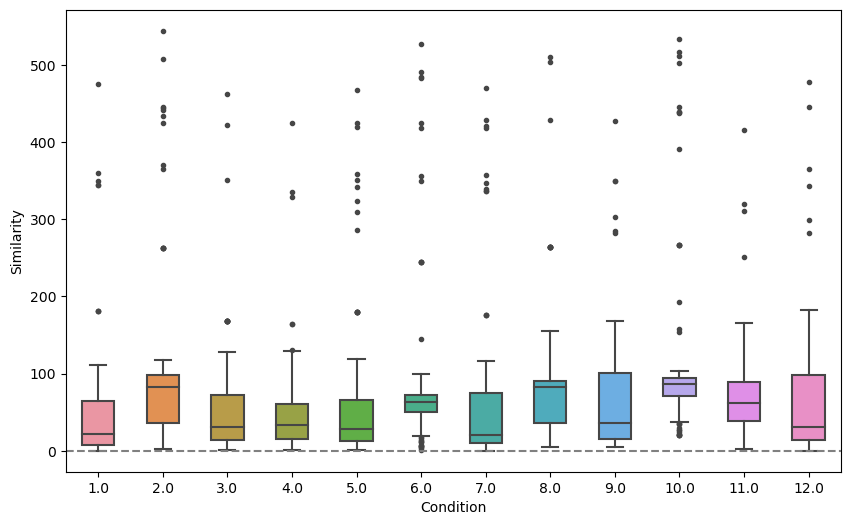

In [124]:
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stimulus_idx', y='fd2_exit', data=allData, width = 0.5, flierprops={"marker": "o", "markersize": 3},)

# Add a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--')

# Adding labels and title
plt.xlabel('Condition')
plt.ylabel('Similarity')
# plt.title('Distribution of Fréchet Distances Across Conditions')

# Show the plot
plt.savefig('fd_12_conditions.pdf')
plt.show()

## Get Linear Projection Predictions

In [125]:
segmented_line = [((250, 150), (250, 450)), ((250, 450), (750, 450)), ((750, 450), (750, 150))]

# Create a function that find the two consecutive coordinates of the ball when it is about to fall outside of the screen
def distance_to_segment(point, segment):
    """Calculate the distance from a point to a line segment."""
    return Point(point).distance(LineString(segment))

def closest_points_to_line(points, segmented_line = segmented_line):
    """Find two points that are nearest to the segmented line and are also near each other."""
    # Calculate distances from all points to the segmented line
    distances = [min(distance_to_segment(point, segment) for segment in segmented_line) for point in points]
    
    # Sort points based on their distance to the segmented line
    sorted_points = sorted(points, key=lambda p: min(distance_to_segment(p, segment) for segment in segmented_line))
    
    for point in sorted_points:
        # Sort other points based on their distance to the current point
        other_points = sorted(points, key=lambda p: np.linalg.norm(np.array(point) - np.array(p)))
        for near_point in other_points[1:3]:  # considering the 2 nearest points
            if abs(distances[points.index(point)] - distances[points.index(near_point)]) < 5:
                return point, near_point
    return None

# Function to get the first two elements of each tuple
def take_first_two(lst):
    return [(a, b) for a, b, _ in lst]

In [126]:
# create the no speed path col
allData['exact_path_no_speed'] = allData['exact_path_single'].apply(take_first_two)

# create the vertical line col
allData['projected_line_0'] = allData['ball_X']

# create the tangential line col
allData['projected_line_1'] = allData['exact_path_no_speed'].apply(closest_points_to_line)

### check by visualizing

In [127]:
def drawProjectedPath(condition, merged_trajectory, ax, zorder):
    # Given data
    subset = merged_trajectory[merged_trajectory['stimulus_idx']==condition]
#     print(subset['projected_line_0'])
    x_vertical = subset['projected_line_0'].iloc[0]
    point1 = subset['projected_line_1'].iloc[0][0]
    point2 = subset['projected_line_1'].iloc[0][1]
    
    # Calculate slope
    if (point2[0] - point1[0]) == 0:
        slope = float('inf')
    else:
        slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
        
        
    # Calculate extended points based on the slope
    x_extended_1 = 100  # at the far left of the plot
    y_extended_1 = point1[1] + slope * (x_extended_1 - point1[0])

    x_extended_2 = 900  # at the far right of the plot
    y_extended_2 = point1[1] + slope * (x_extended_2 - point1[0])
    
    # Create the two line segments
    vertical_line = LineString([(x_vertical, -200), (x_vertical, 600)])  # assuming a large y range for the vertical line
    extended_line = LineString([(x_extended_1, y_extended_1), (x_extended_2, y_extended_2)])
    
    # Calculate intersection
    intersection = vertical_line.intersection(extended_line)
    print(f'stimulus:{condition}')
    print(intersection)

    # Plotting
    if intersection and 100 <= intersection.x <= 900 and 60 <= intersection.y <= 540:
        ax.plot([x_vertical, x_vertical], [0, intersection.y], label="Vertical Line", linestyle='--', color='black', zorder = zorder) 
        if intersection.y <= y_extended_1:
            ax.plot([x_extended_1, intersection.x], [y_extended_1, intersection.y], label="Extended Line", linestyle='--', color='black', zorder = zorder)
        else:
            ax.plot([intersection.x, x_extended_2], [intersection.y, y_extended_2], label="Extended Line", linestyle='--', color='black', zorder = zorder)
        ax.scatter(*intersection.xy, color='yellow', label="Intersection", s = 100, zorder = 20)
    else:
        ax.plot([x_vertical, x_vertical], [0, 600], label="Vertical Line", linestyle='--', color='black', zorder = zorder)  # using a large y range for visualization
        ax.plot([x_extended_1, x_extended_2], [y_extended_1, y_extended_2], label="Extended Line", linestyle='--', color='black', zorder = zorder)
        ax.scatter(*intersection.xy, color='yellow', label="Intersection", s = 100, zorder = 20)
    return intersection

def drawTrajectory(condition, df, ax, zorder, colorIsSpeed = False):
    subset = df[df['stimulus_idx'] == condition]
    trails = subset['exact_path_single']
#     for i in range(len(trails)):
    data_list = subset['exact_path_single'].iloc[0]
#     flip = subset['flipped'].iloc[i]
#     data_list = json.loads(data_string)
    x_coords = [item[0] for item in data_list]
    y_coords = [item[1] for item in data_list]
#     speeds = [item['speed'] for item in data_list]
#     if colorIsSpeed:
#         ax.scatter(x_coords, y_coords, c=speeds, cmap='hsv', s=4, vmin=global_min, vmax=global_max, zorder = zorder)
#     else:
    ax.scatter(x_coords, y_coords, c='cyan', s=4, zorder = zorder)

In [128]:
df_all = allData

stimulus:1.0
POINT (322.3 217.74551669457017)
stimulus:5.0
POINT (500 83.10062259154809)
stimulus:9.0
POINT (604.4000000000001 126.85299412606867)
stimulus:2.0
POINT (322.3 -37.975915638233545)
stimulus:6.0
POINT (500 189.92909825697632)
stimulus:10.0
POINT (604.4000000000001 215.50214355555383)
stimulus:3.0
POINT (322.3 287.3327096511259)
stimulus:7.0
POINT (500 227.2843295913261)
stimulus:11.0
POINT (604.4000000000001 372.6340973215488)
stimulus:4.0
POINT (322.3 297.4070551689986)
stimulus:8.0
POINT (500 83.37520955795618)
stimulus:12.0
POINT (604.4000000000001 132.63270311514998)


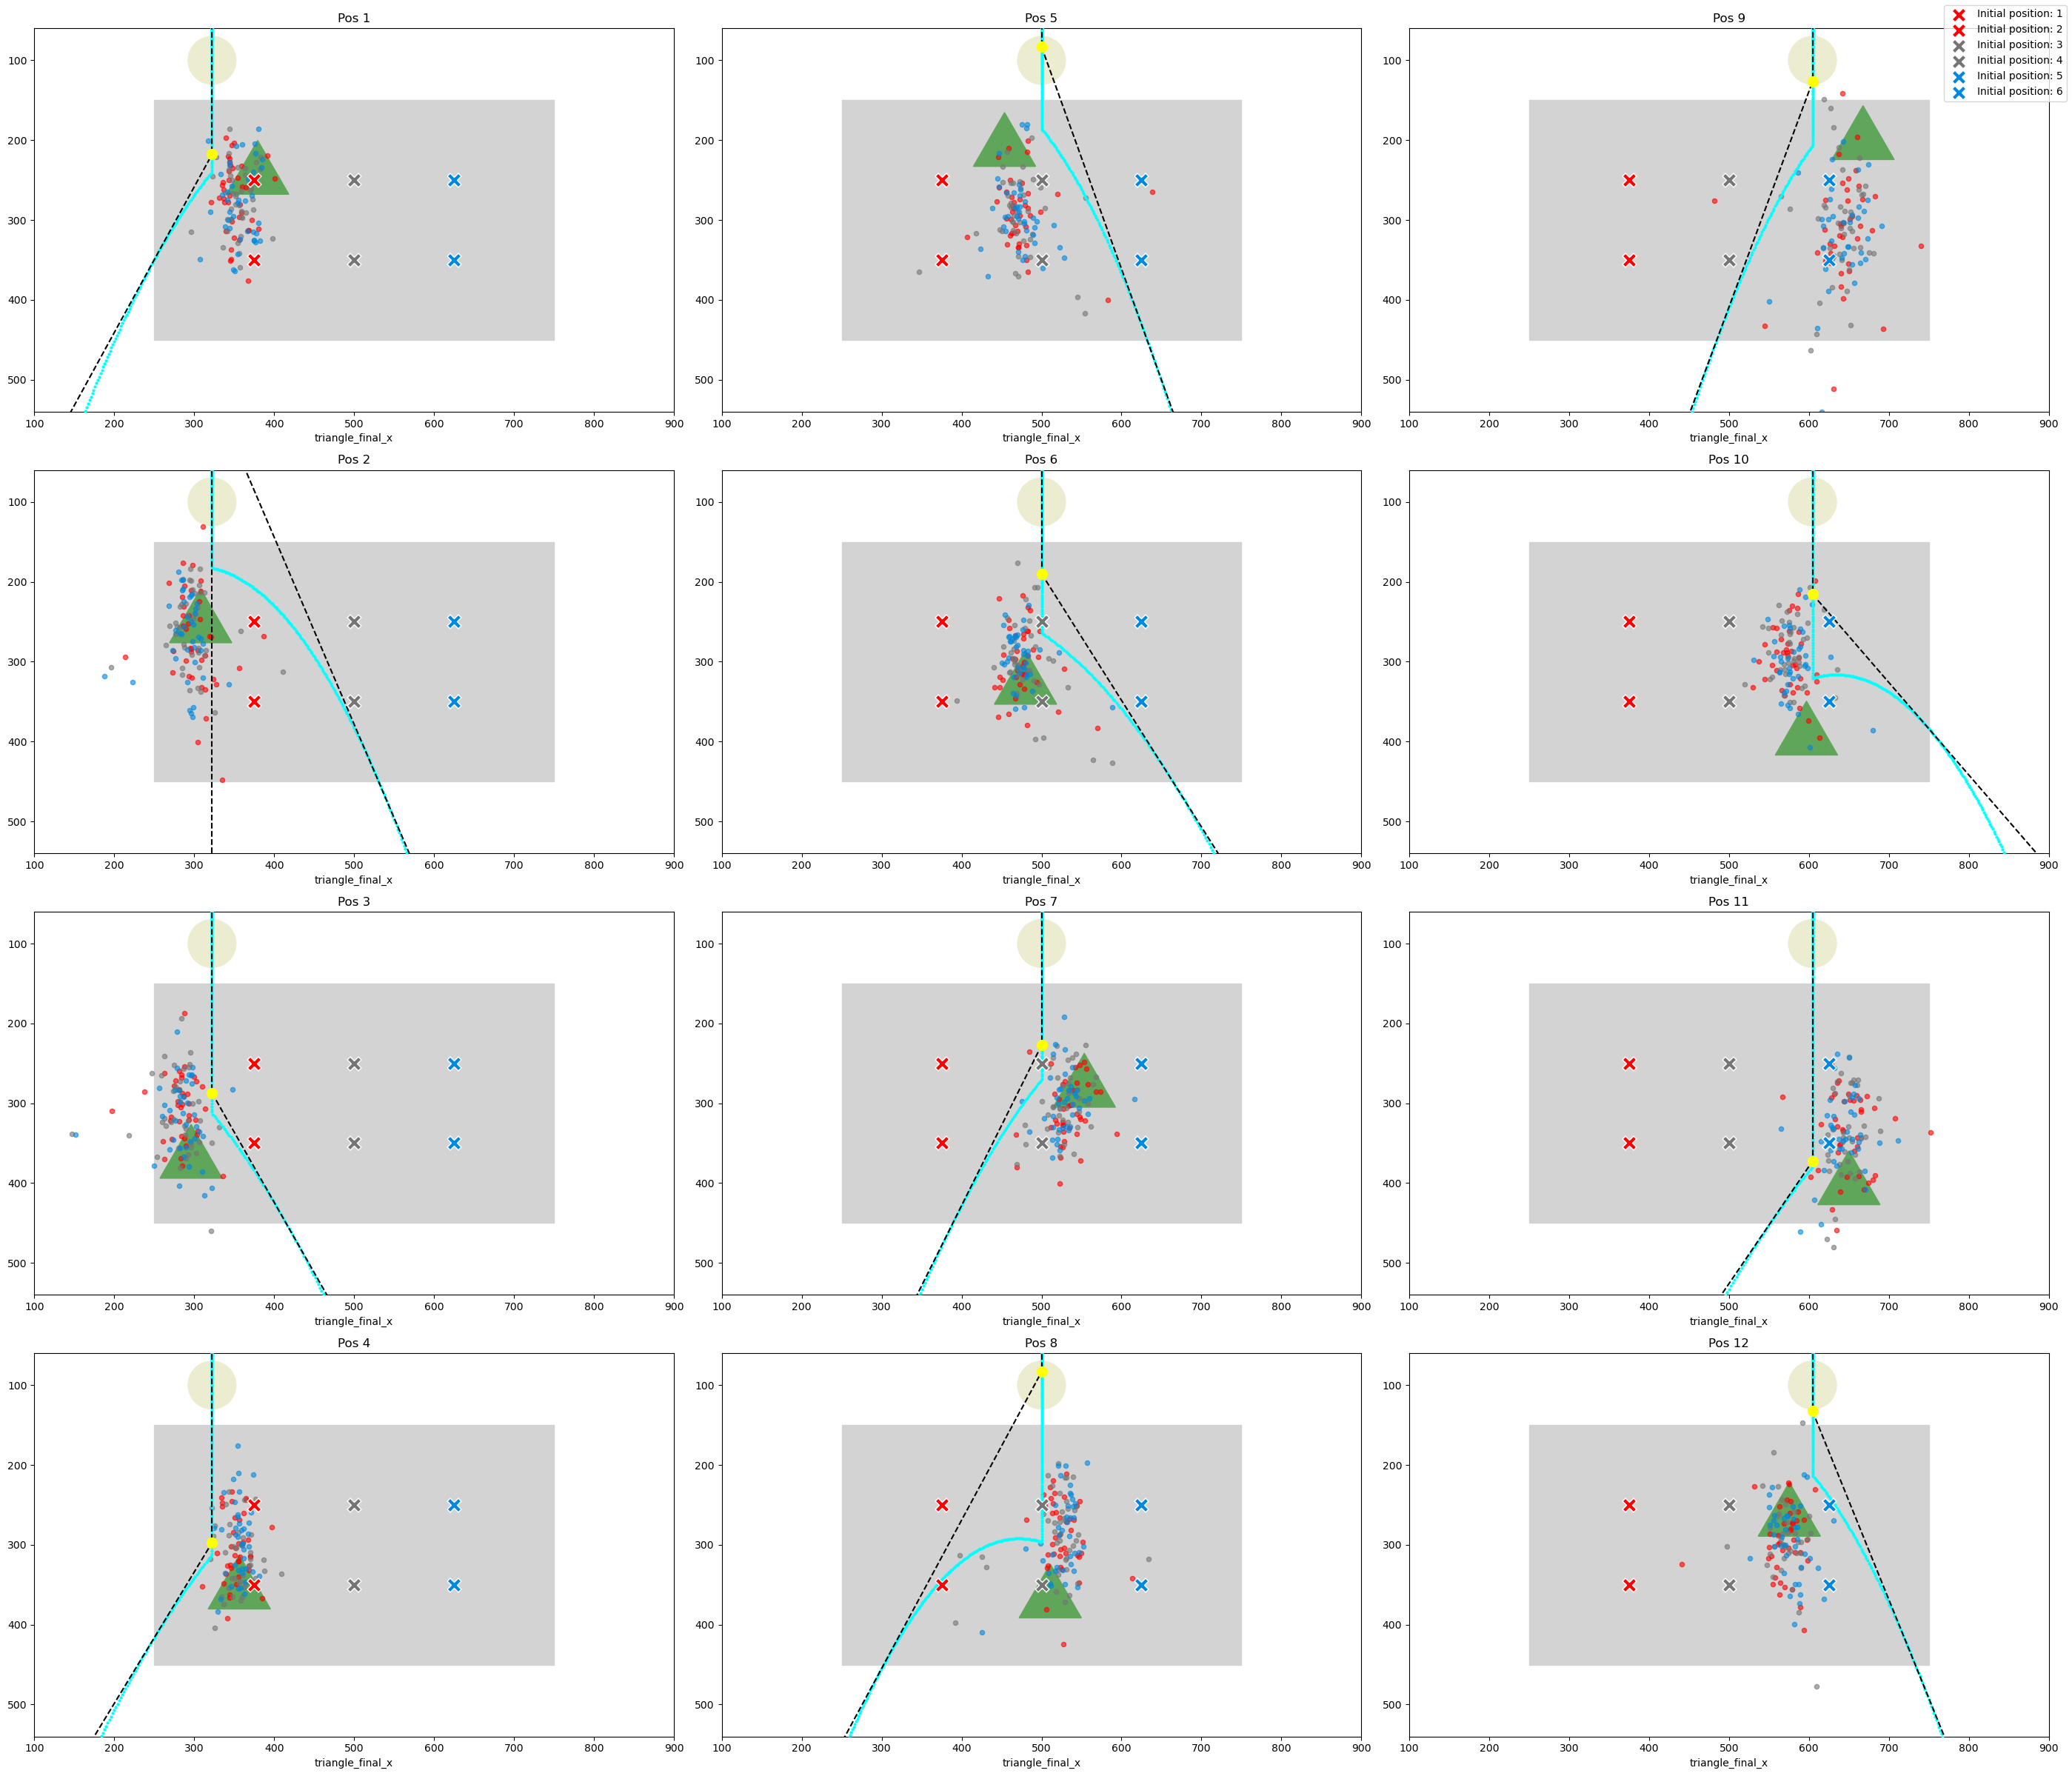

In [129]:
intersections = {}
conditions = np.sort(df_all['obstacle_idx'].unique())

# Define a color map for your conditions
color_map = {1: 'red', 2: 'red', 3: '#757575', 4: '#757575', 5: '#0088DE', 6: '#0088DE'}

# Reshape positions into a 3x4 array and flatten by column
positions = np.sort(df_all['stimulus_idx'].unique())
positions = positions.reshape((3, 4)).T.flatten()

fig, axs = plt.subplots(4, 3, figsize=(28, 24)) # Creates a 4x3 grid of Axes objects

# Empty lists to hold all handles and labels
handles, labels = [], []

for index, position in enumerate(positions):
    ax = axs.flatten()[index]  # Select the current Axes object

    # Draw triangle and rectangle
    x_coord = df_all.loc[df_all['stimulus_idx'] == position, 'obstacle_groundTruth_x'].values[0]
    y_coord = df_all.loc[df_all['stimulus_idx'] == position, 'obstacle_groundTruth_y'].values[0]
    x_coord_ball = df_all.loc[df_all['stimulus_idx'] == position, 'ball_X'].values[0]
    y_coord_ball = 100
    ball = patches.Circle((x_coord_ball, y_coord_ball), radius = 30, color = '#ececd1')
    triangle = patches.RegularPolygon((x_coord,y_coord), orientation=np.pi, numVertices=3, radius=45, color='#5fa55a', fill=True)
    rect = patches.Rectangle((250,150),500,300,linewidth=1, edgecolor='lightgray',facecolor='lightgray')
    ax.add_patch(ball)
    ax.add_patch(rect)
    ax.add_patch(triangle)
    
    for i, condition in enumerate(conditions):
        subset = df_all[(df_all['stimulus_idx'] == position) & (df_all['obstacle_idx'] == condition)]
        
        # Bin data and get bin counts
#         ret = binned_statistic_2d(subset["triangle_final_x_flipback"], subset["triangle_final_y"], None, 'count', bins=[np.linspace(0,1000,301),np.linspace(0,600,181)])
#         x_bin_centers = (ret.x_edge[1:] + ret.x_edge[:-1]) / 2
#         y_bin_centers = (ret.y_edge[1:] + ret.y_edge[:-1]) / 2
#         x_center, y_center = np.meshgrid(x_bin_centers, y_bin_centers)
        
        # Plot scatter plot where the size is proportional to the bin count
#         size = ret.statistic.T.flatten()
#         ax.scatter(x_center.flatten(), y_center.flatten(), s=size*100, color=color_map[i+1], alpha = 0.6)
        ax.scatter(subset["triangle_final_x_flipback"], subset["triangle_final_y"], s=20, color=color_map[i+1], alpha = 0.6)
        
        # Plot initial positions
        initial_x = subset['obstacle_initial_x'].unique()
        initial_y = subset['obstacle_initial_y'].unique()
        ax.scatter(initial_x, initial_y, marker='x', color='white',linewidth=5, s=130, zorder=10)  
        scatter = ax.scatter(initial_x, initial_y, marker='x', color=color_map[i+1],linewidth=3, s=100, zorder=10)  

        # Add handles and labels to lists
        if len(handles) < len(conditions):
            handles.append(scatter)
            labels.append(f'Initial position: {int(condition)}')
    
    # plot the trajectory
    drawTrajectory(position, df_all, ax, 7)
    
    # plot the projected path
    intersection = drawProjectedPath(position, df_all, ax, 7)
    intersections[position] = [intersection.x, intersection.y]
    
    ax.set_xlim(100, 900)
    ax.set_ylim(60, 540)
    ax.invert_yaxis() # invert the y-axis
    ax.set_xlabel("triangle_final_x")
    ax.set_title(f'Pos {int(position)}')
    
plt.tight_layout()  
# add color bar
# cax = fig.add_axes([1.05, 0.2, 0.02, 0.6])  # Adjust the position and size as needed
# cb = ColorbarBase(cax, cmap=hsv, orientation='vertical', norm=plt.Normalize(vmin=global_min, vmax=global_max))
# cb.set_label('Speed Value')

fig.legend(handles, labels, loc='upper right')
plt.show()

In [130]:
intersections

{1.0: [322.3, 217.74551669457017],
 5.0: [500.0, 83.10062259154809],
 9.0: [604.4000000000001, 126.85299412606867],
 2.0: [322.3, -37.975915638233545],
 6.0: [500.0, 189.92909825697632],
 10.0: [604.4000000000001, 215.50214355555383],
 3.0: [322.3, 287.3327096511259],
 7.0: [500.0, 227.2843295913261],
 11.0: [604.4000000000001, 372.6340973215488],
 4.0: [322.3, 297.4070551689986],
 8.0: [500.0, 83.37520955795618],
 12.0: [604.4000000000001, 132.63270311514998]}

In [131]:
# modify the intersections
# assume that participants always assume that the ball bounces off the midpoint of the triangle's sides
d = (30 + (45/2))/2*(3**0.5) # 45.46633369868302
fall_Direction = {1.0: 'left', 2.0: 'right', 3.0: 'right', 4.0: 'left', 
                 5.0: 'right', 6.0: 'right', 7.0: 'left', 8.0: 'left',
                 9.0: 'left', 10.0: 'right', 11.0: 'left', 12.0: 'right'}
intersections_modified = {}
for key in intersections:
    direction = fall_Direction[key]
    if direction == 'left':
        intersections_modified[key] = [intersections[key][0] + d, intersections[key][1]]
    else:
        intersections_modified[key] = [intersections[key][0] - d, intersections[key][1]]

In [132]:
intersections_modified

{1.0: [367.766333698683, 217.74551669457017],
 5.0: [454.533666301317, 83.10062259154809],
 9.0: [649.8663336986831, 126.85299412606867],
 2.0: [276.833666301317, -37.975915638233545],
 6.0: [454.533666301317, 189.92909825697632],
 10.0: [558.9336663013171, 215.50214355555383],
 3.0: [276.833666301317, 287.3327096511259],
 7.0: [545.466333698683, 227.2843295913261],
 11.0: [649.8663336986831, 372.6340973215488],
 4.0: [367.766333698683, 297.4070551689986],
 8.0: [545.466333698683, 83.37520955795618],
 12.0: [558.9336663013171, 132.63270311514998]}

## 1D comparison  (Anisotropic Standard Deviation without Covariance)

### Groundtruth

In [133]:
df_all.groupby('stimulus_idx')['obstacle_groundTruth_x'].first().values

array([379.37114317, 308.07114317, 296.07114317, 356.42114317,
       453.67114317, 479.92114317, 553.47114317, 510.87114317,
       667.62114317, 596.87114317, 650.02114317, 575.42114317])

In [134]:
def plotComparison(x_human, y_human, x_model, y_model, std_dev_human_x, std_dev_human_y, label, std_dev_model_x = None, std_dev_model_y = None):
    # Creating the plots with error bars
    plt.figure(figsize=(10, 5))

    # Plot for X comparisons
    plt.subplot(1, 2, 1)
#     if not std_dev_model_x:
    plt.errorbar(x_model, x_human, xerr=std_dev_model_x, yerr=std_dev_human_x, fmt='o', color='blue', ecolor='lightgray', label='X Comparisons')
#     else:
#         plt.errorbar(x_model, x_human, yerr=std_dev_human_x, fmt='o', color='blue', ecolor='lightgray', label='X Comparisons')
#     plt.axis('equal')
    xlim = plt.xlim()
    ylim = plt.ylim()
    line_range = [min(xlim[0], ylim[0]), max(xlim[1], ylim[1])]
#     print(line_range)
    plt.plot(line_range, line_range, 'k--')
#     plt.title(f'{label} vs. Human X Predictions')
    plt.xlabel(f'{label} X', fontsize=16)
    plt.ylabel('Human X Responses', fontsize=16)
    plt.xlim(line_range)
    plt.ylim(line_range)
    plt.legend()

    # Plot for Y comparisons
    plt.subplot(1, 2, 2)
#     if not std_dev_model_y:
    plt.errorbar(y_model, y_human, xerr=std_dev_model_y, yerr=std_dev_human_y, fmt='o', color='green', ecolor='lightgray', label='Y Comparisons')
#     else:
#         plt.errorbar(y_model, y_human, yerr=std_dev_human_y, fmt='o', color='green', ecolor='lightgray', label='Y Comparisons')
    xlim = plt.xlim()
    ylim = plt.ylim()
    line_range = [min(xlim[0], ylim[0]), max(xlim[1], ylim[1])]
#     print(line_range)
    plt.plot(line_range, line_range, 'k--')
#     plt.title(f'{label} vs. Human Y Predictions')
    plt.xlabel(f'{label} Y', fontsize=16)
    plt.ylabel('Human Y Responses', fontsize=16)
    plt.xlim(line_range)
    plt.ylim(line_range)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'{label} vs. Human Predictions.pdf')
    plt.show()

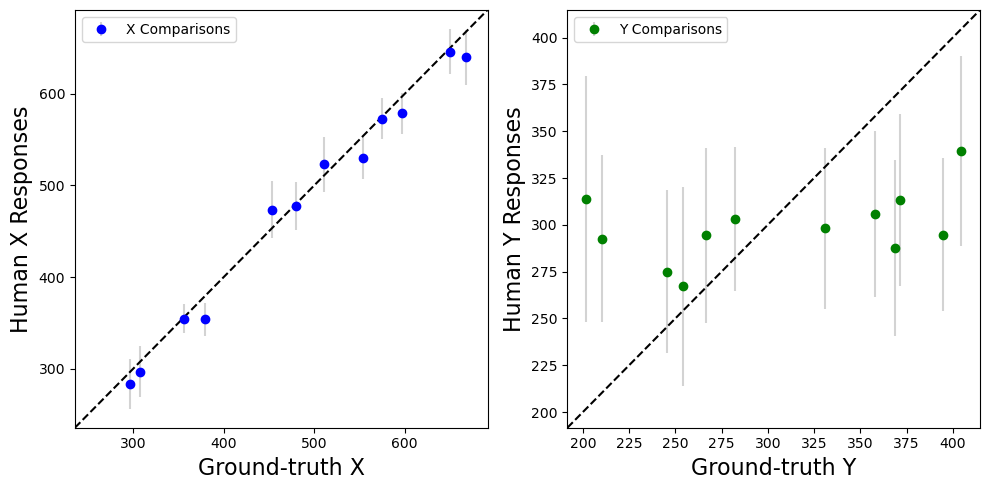

In [135]:
# Obtain data
x_human = df_all.groupby('stimulus_idx')['triangle_final_x_flipback'].mean().values # automatically sorted by 1, 2, 3, ...
y_human = df_all.groupby('stimulus_idx')['triangle_final_y'].mean().values
x_model = df_all.groupby('stimulus_idx')['obstacle_groundTruth_x'].first().values
y_model = df_all.groupby('stimulus_idx')['obstacle_groundTruth_y'].first().values

# Assuming some standard deviations for model and human predictions
std_dev_human_x = df_all.groupby('stimulus_idx')['triangle_final_x_flipback'].std().values
std_dev_human_y = df_all.groupby('stimulus_idx')['triangle_final_y'].std().values

plotComparison(x_human, y_human, x_model, y_model, std_dev_human_x, std_dev_human_y, 'Ground-truth')

In [136]:
from scipy.stats import pearsonr

correlation_x, p_value_x = pearsonr(x_human, x_model)
print("Pearson Correlation X:", correlation_x)
correlation_y, p_value_y = pearsonr(y_human, y_model)
print("Pearson Correlation Y:", correlation_y)

Pearson Correlation X: 0.9934416485199411
Pearson Correlation Y: 0.42675805865504857


Best standard deviation_x: [30.870180360721445, 29.667835671342687, 29.667835671342687, 16.0412625250501, 36.88190380761523, 26.461583166332666, 32.87408817635271, 32.0725250501002, 40.889719438877755, 28.46549098196393, 24.85845691382766, 22.854549098196394]
Best standard deviation_y: [52.512384769539075, 54.51629258517034, 74.15458917835672, 68.14286573146293, 93.39210420841684, 53.71472945891784, 43.695190380761524, 94.19366733466934, 129.8632264529058, 107.82024048096193, 82.57100200400802, 54.11551102204409]
Best average MLE_x: -572.5398281663294
Best average MLE_y: -683.0132229614472


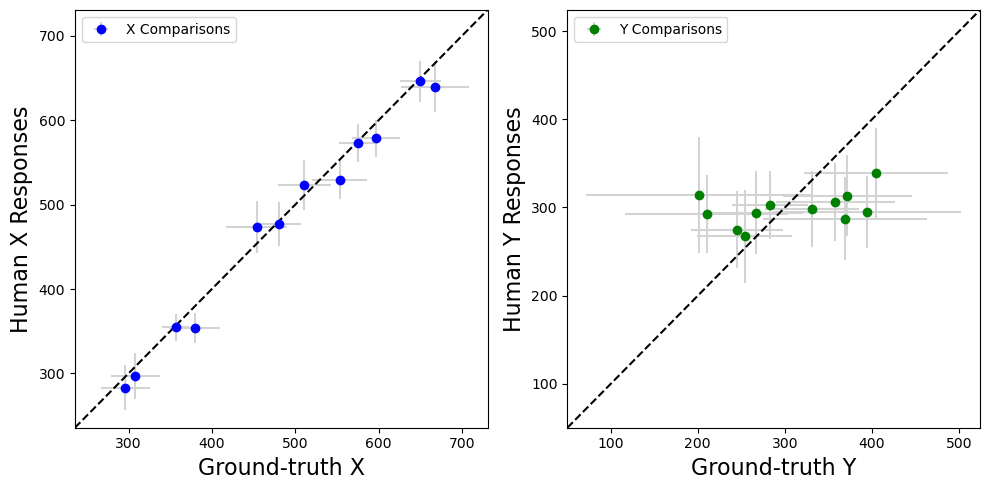

In [139]:
std_dev_model_x, std_dev_model_y, mle_x_all, mle_y_all = find_best_std_dev_all_condition_1d(df_all, start_std_dev, end_std_dev, num_steps, x_model, y_model)
print(f"Best standard deviation_x: {std_dev_model_x}")
print(f"Best standard deviation_y: {std_dev_model_y}")
print(f"Best average MLE_x: {np.mean(mle_x_all)}")
print(f"Best average MLE_y: {np.mean(mle_y_all)}")

# std_dev_model_x and std_dev_model_y now contain the best standard deviations for each stimulus_idx
plotComparison(x_human, y_human, x_model, y_model, std_dev_human_x, std_dev_human_y, 'Ground-truth', std_dev_model_x, std_dev_model_y)

In [140]:
find_single_best_std_dev_all_conditions_1d(df_all, start_std_dev, end_std_dev, num_steps, x_model, y_model)

(30.06861723446894, 79.76553106212425, -578.2051561513487, -695.8119202934868)

### if not separate estimations for x,y

In [ ]:
def getLikelihoodwithoutCovar(model_x, model_y, sigma_x, sigma_y): # return the averaged likelihood across 12 conditions using the MLE
    
    

#### 2D

Best average MLE: -1428.2829522716474


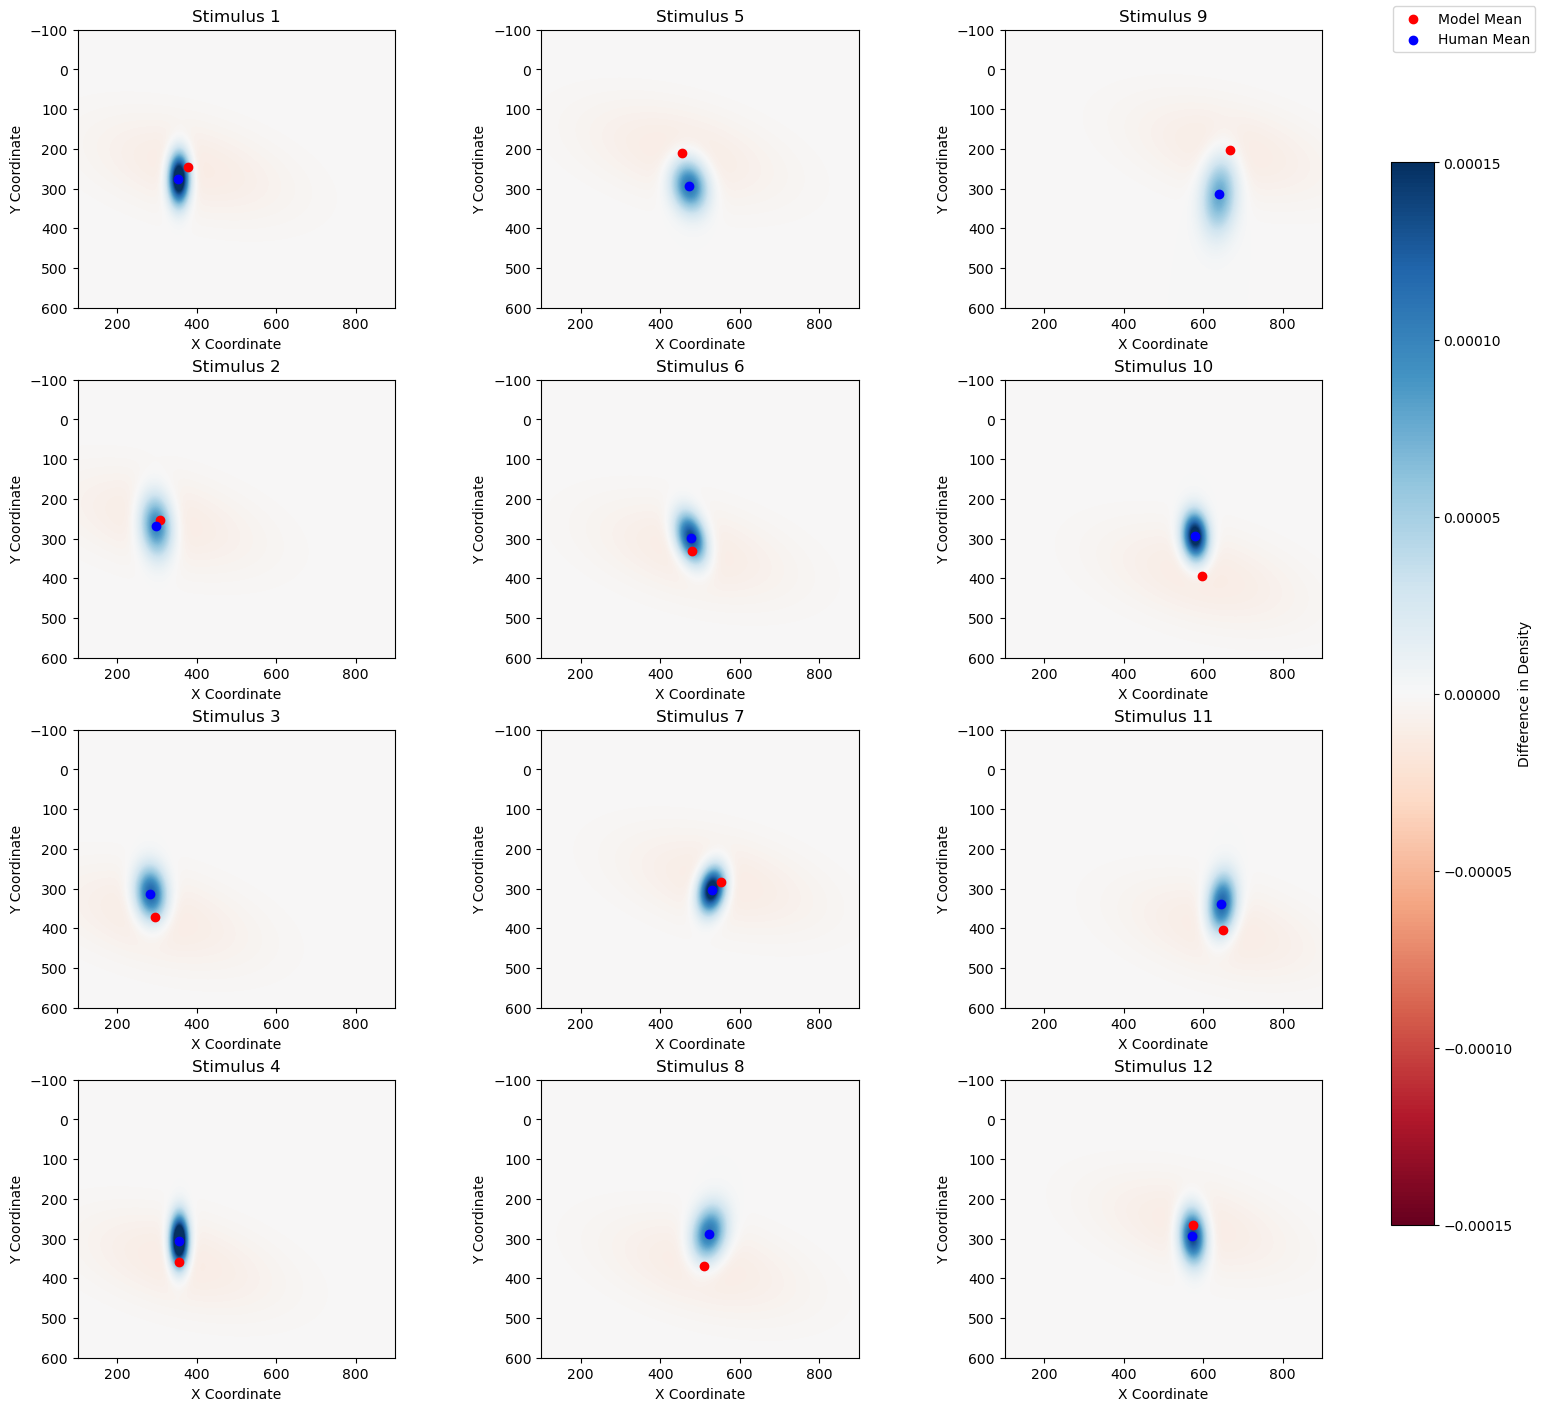

In [109]:
from scipy.stats import multivariate_normal

# x_model = [intersections[key+1][0] for key in range(12)]
# y_model = [intersections[key+1][1] for key in range(12)]

# x_model = [intersections_modified[key+1][0] for key in range(12)]
# y_model = [intersections_modified[key+1][1] for key in range(12)]
x_model = df_all.groupby('stimulus_idx')['obstacle_groundTruth_x'].first().values
y_model = df_all.groupby('stimulus_idx')['obstacle_groundTruth_y'].first().values

# Creating 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(16, 14), constrained_layout=True)

positions = positions = np.sort(df_all['stimulus_idx'].unique())
positions = positions.reshape((3, 4)).T.flatten()

# Aggregate data from all conditions
all_data = np.vstack([df_all[df_all['stimulus_idx'] == pos][['triangle_final_x_flipback', 'triangle_final_y']].values for pos in positions])

# Mean models for all conditions
all_mean_models = np.array([x_model, y_model]).T

# Find a single best-fit covariance matrix for all conditions
optimized_covariance = find_single_best_covariance(all_data, all_mean_models)

mle_all = []

for index, position in enumerate(positions):
    ax = axes.flatten()[index]
    subset = df_all[df_all['stimulus_idx'] == position]
    mean_model = [x_model[int(position-1)], y_model[int(position-1)]]
    xy_positions = np.column_stack((subset['triangle_final_x_flipback'], subset['triangle_final_y']))

    # Use the same optimized covariance matrix for each condition
    mean_human = np.mean(xy_positions, axis=0)
    rv_model = multivariate_normal(mean_model, optimized_covariance)
    rv_human = multivariate_normal(mean_human, np.cov(xy_positions.T))

    likelihood = calculate_likelihood(xy_positions, mean_model, optimized_covariance)
    mle_all.append(likelihood)

    # Create a grid of x and y values
    x = np.linspace(100, 900, 1000)
    y = np.linspace(-100, 600, 1000)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Calculate the density values
    density_model = rv_model.pdf(pos)
    density_human = rv_human.pdf(pos)

    # Calculate difference in densities
    density_diff = density_human - density_model

    # Plotting in the current subplot
#     cax = ax.imshow(density_diff, extent=[0, 100, 0, 100], origin='lower', cmap='RdBu', clim=(-0.001, 0.001))
    cax = ax.imshow(density_diff, extent=[100, 900, -100, 600], origin='lower', cmap='RdBu', clim=(-0.00015, 0.00015))
    ax.scatter(*mean_model, color='red', label='Model Mean')
    ax.scatter(*mean_human, color='blue', label='Human Mean')
    ax.set_title(f'Stimulus {int(position)}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.invert_yaxis()

print(f"Best average MLE: {-np.mean(mle_all)}")

# Capture handles for legend (using the last subplot for convenience)
handles, labels = axes[-1, -1].get_legend_handles_labels()
    
# Adding a unified legend to the figure
fig.legend(handles, labels, loc='upper right')

# Adding a colorbar
fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.8, aspect=25, label='Difference in Density')

plt.show()

### Intersection

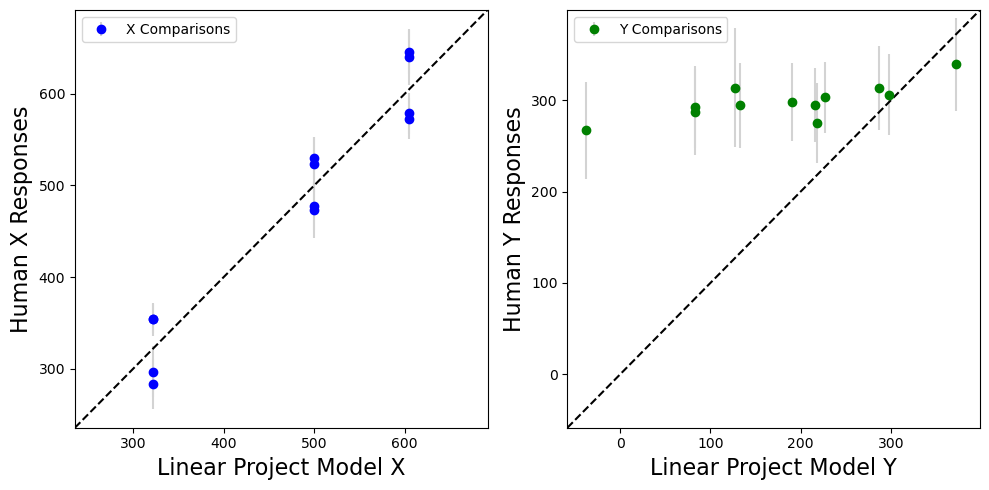

In [85]:
# Obtain data
x_human = df_all.groupby('stimulus_idx')['triangle_final_x_flipback'].mean().values
y_human = df_all.groupby('stimulus_idx')['triangle_final_y'].mean().values
x_model = [intersections[key+1][0] for key in range(12)]
y_model = [intersections[key+1][1] for key in range(12)]

# Assuming some standard deviations for model and human predictions
std_dev_human_x = df_all.groupby('stimulus_idx')['triangle_final_x_flipback'].std().values
std_dev_human_y = df_all.groupby('stimulus_idx')['triangle_final_y'].std().values

plotComparison(x_human, y_human, x_model, y_model, std_dev_human_x, std_dev_human_y, 'Linear Project Model')

#### if adding best-fit std for the model per condition

In [138]:
from scipy.stats import norm

def find_best_std_dev_1d(data, specified_mean, start_std_dev, end_std_dev, num_steps):
    """
    Finds the standard deviation that maximizes the log likelihood for a given mean and data.

    Parameters:
    data (array-like): The data points.
    specified_mean (float): The mean value to be used in the log likelihood calculation.
    start_std_dev (float): The starting value of the standard deviation range.
    end_std_dev (float): The end value of the standard deviation range.
    num_steps (int): The number of steps in the standard deviation range.

    Returns:
    float: The standard deviation that maximizes the log likelihood.
    """
    def log_likelihood(data, mean, std_dev):
        return np.sum(norm.logpdf(data, mean, std_dev))

    # Range of standard deviations to test
    std_devs = np.linspace(start_std_dev, end_std_dev, num_steps)

    # Find the standard deviation with the maximum log likelihood
    max_log_likelihood = -np.inf
    best_std_dev = None
    for std_dev in std_devs:
        current_log_likelihood = log_likelihood(data, specified_mean, std_dev)
        if current_log_likelihood > max_log_likelihood:
            max_log_likelihood = current_log_likelihood
            best_std_dev = std_dev

    return best_std_dev, max_log_likelihood

def find_best_std_dev_all_condition_1d(df_all, start_std_dev, end_std_dev, num_steps, x_model, y_model):
    # Initialize lists to store the standard deviations
    std_dev_model_x = []
    std_dev_model_y = []
    mle_x_all = []
    mle_y_all = []

    # Iterate through each stimulus_idx
    for idx in range(12):
        # Filter data for the current stimulus_idx
        filtered_data_x = df_all[df_all['stimulus_idx'] == idx+1]['triangle_final_x_flipback']
        filtered_data_y = df_all[df_all['stimulus_idx'] == idx+1]['triangle_final_y']

        # Find the best standard deviation for both x and y
        best_std_dev_x, max_log_likelihood_x = find_best_std_dev_1d(filtered_data_x.to_numpy(), x_model[idx], start_std_dev, end_std_dev, num_steps)
        best_std_dev_y, max_log_likelihood_y = find_best_std_dev_1d(filtered_data_y.to_numpy(), y_model[idx], start_std_dev, end_std_dev, num_steps)

        # Append the results to the lists
        std_dev_model_x.append(best_std_dev_x)
        std_dev_model_y.append(best_std_dev_y)
        mle_x_all.append(max_log_likelihood_x)
        mle_y_all.append(max_log_likelihood_y)
        
    return std_dev_model_x, std_dev_model_y, mle_x_all, mle_y_all

#### if adding best-fit std for the model for all conditions

In [137]:
def find_single_best_std_dev_1d(data_by_condition, specified_means, start_std_dev, end_std_dev, num_steps):
    """
    Finds the standard deviation that maximizes the sum of log likelihoods for given means and data across conditions.
    """
    def log_likelihood(condition_data, mean, std_dev):
        return np.sum(norm.logpdf(condition_data, mean, std_dev))

    # Range of standard deviations to test
    std_devs = np.linspace(start_std_dev, end_std_dev, num_steps)

    # Find the standard deviation with the maximum sum of log likelihoods across conditions
    max_sum_log_likelihood = -np.inf
    best_std_dev = None
    for std_dev in std_devs:
        sum_log_likelihood = 0
        for condition_data, mean in zip(data_by_condition, specified_means):
            sum_log_likelihood += log_likelihood(condition_data, mean, std_dev)

        if sum_log_likelihood > max_sum_log_likelihood:
            max_sum_log_likelihood = sum_log_likelihood
            best_std_dev = std_dev

    return best_std_dev, max_sum_log_likelihood

def find_single_best_std_dev_all_conditions_1d(df_all, start_std_dev, end_std_dev, num_steps, x_model, y_model):
    # Separate data by conditions
    data_by_condition_x = [df_all[df_all['stimulus_idx'] == idx+1]['triangle_final_x_flipback'].to_numpy() for idx in range(12)]
    data_by_condition_y = [df_all[df_all['stimulus_idx'] == idx+1]['triangle_final_y'].to_numpy() for idx in range(12)]

    # Find the best standard deviation for X and Y dimensions
    best_std_dev_x, max_sum_log_likelihood_x = find_single_best_std_dev_1d(data_by_condition_x, x_model, start_std_dev, end_std_dev, num_steps)
    best_std_dev_y, max_sum_log_likelihood_y = find_single_best_std_dev_1d(data_by_condition_y, y_model, start_std_dev, end_std_dev, num_steps)

    return best_std_dev_x, best_std_dev_y, max_sum_log_likelihood_x/12, max_sum_log_likelihood_y/12

In [93]:
# Filter the DataFrame for a specific stimulus_idx, e.g., 1
filtered_data = df_all[df_all['stimulus_idx'] == 1]['triangle_final_x_flipback']

data = filtered_data.to_numpy()

# Specify the mean and range for standard deviation search
mean = x_model[0]  # replace with your specified mean
start_std_dev = 0.01  # start value for standard deviation
end_std_dev = 200   # end value for standard deviation
num_steps = 500     # number of steps

# Find the best standard deviation
best_std_dev, best_mle = find_best_std_dev_1d(data, mean, start_std_dev, end_std_dev, num_steps)
print(f"Best standard deviation: {best_std_dev}")
print(f"Best MLE: {best_mle}")

Best standard deviation: 36.48112224448898
Best MLE: -601.5127702454254


Best standard deviation_x: [36.48112224448898, 37.683466933867734, 47.302224448897796, 36.08034068136273, 40.4889378757515, 34.877995991983965, 37.28268537074148, 37.28268537074148, 46.099879759519034, 33.67565130260521, 48.50456913827655, 38.88581162324649]
Best standard deviation_y: [71.7498997995992, 200.0, 52.512384769539075, 44.89753507014028, 200.0, 116.23665330661323, 84.97569138276553, 200.0, 197.99609218436873, 88.98350701402806, 60.52801603206413, 168.33825651302604]
Best average MLE_x: -610.7415074205172
Best average MLE_y: -739.8574359578478


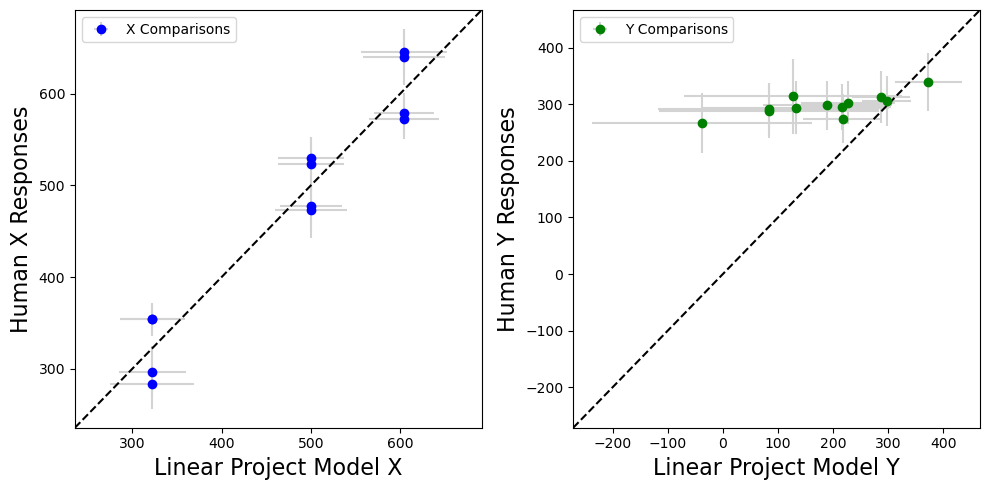

In [94]:
# Obtain data
x_human = df_all.groupby('stimulus_idx')['triangle_final_x_flipback'].mean().values
y_human = df_all.groupby('stimulus_idx')['triangle_final_y'].mean().values
x_model = [intersections[key+1][0] for key in range(12)]
y_model = [intersections[key+1][1] for key in range(12)]

# Specify the standard deviation search parameters
start_std_dev = 0.01  # start value for standard deviation
end_std_dev = 200   # end value for standard deviation
num_steps = 500     # number of steps

std_dev_model_x, std_dev_model_y, mle_x_all, mle_y_all = find_best_std_dev_all_condition_1d(df_all, start_std_dev, end_std_dev, num_steps, x_model, y_model)
print(f"Best standard deviation_x: {std_dev_model_x}")
print(f"Best standard deviation_y: {std_dev_model_y}")
print(f"Best average MLE_x: {np.mean(mle_x_all)}")
print(f"Best average MLE_y: {np.mean(mle_y_all)}")

# std_dev_model_x and std_dev_model_y now contain the best standard deviations for each stimulus_idx
plotComparison(x_human, y_human, x_model, y_model, std_dev_human_x, std_dev_human_y, 'Linear Project Model', std_dev_model_x, std_dev_model_y)

In [95]:
find_single_best_std_dev_all_conditions_1d(df_all, start_std_dev, end_std_dev, num_steps, x_model, y_model)

(39.687374749499, 156.71559118236473, -612.4718893737573, -776.9540301832031)

### Intersection Modified

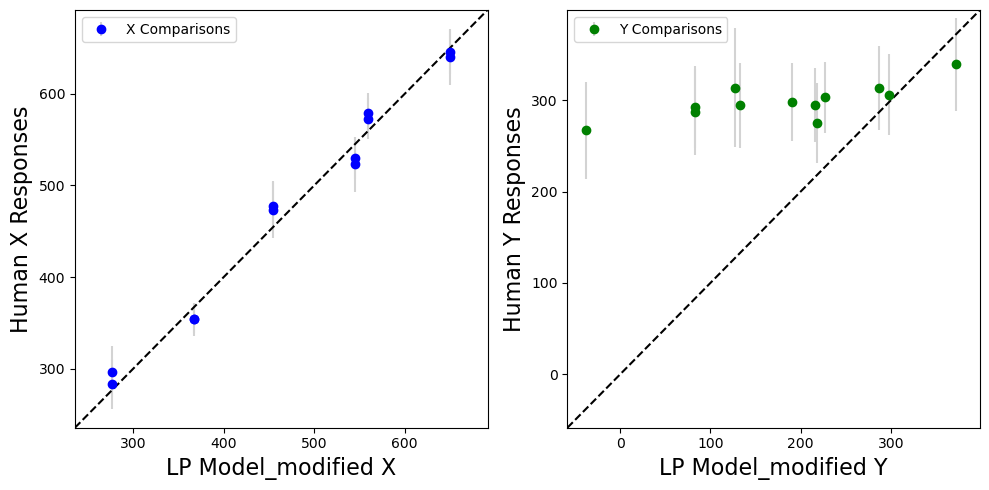

In [112]:
# Obtain data
x_human = df_all.groupby('stimulus_idx')['triangle_final_x_flipback'].mean().values
y_human = df_all.groupby('stimulus_idx')['triangle_final_y'].mean().values
x_model = [intersections_modified[key+1][0] for key in range(12)]
y_model = [intersections_modified[key+1][1] for key in range(12)]

# Assuming some standard deviations for model and human predictions
std_dev_human_x = df_all.groupby('stimulus_idx')['triangle_final_x_flipback'].std().values
std_dev_human_y = df_all.groupby('stimulus_idx')['triangle_final_y'].std().values

plotComparison(x_human, y_human, x_model, y_model, std_dev_human_x, std_dev_human_y, 'LP Model_modified')

In [113]:
correlation_x, p_value_x = pearsonr(x_human, x_model)
print("Pearson Correlation X:", correlation_x)
correlation_y, p_value_y = pearsonr(y_human, y_model)
print("Pearson Correlation Y:", correlation_y)

Pearson Correlation X: 0.9917962441306964
Pearson Correlation Y: 0.7431237719881394


Best standard deviation_x: [22.453767535070142, 34.07643286573146, 27.663927855711425, 20.44985971943888, 36.48112224448898, 34.477214428857714, 27.663927855711425, 37.28268537074148, 31.671743486973952, 29.667835671342687, 24.85845691382766, 26.461583166332666]
Best standard deviation_y: [71.7498997995992, 200.0, 52.512384769539075, 44.89753507014028, 200.0, 116.23665330661323, 84.97569138276553, 200.0, 197.99609218436873, 88.98350701402806, 60.52801603206413, 168.33825651302604]
Best average MLE_x: -574.1732838979432
Best average MLE_y: -739.8574359578478


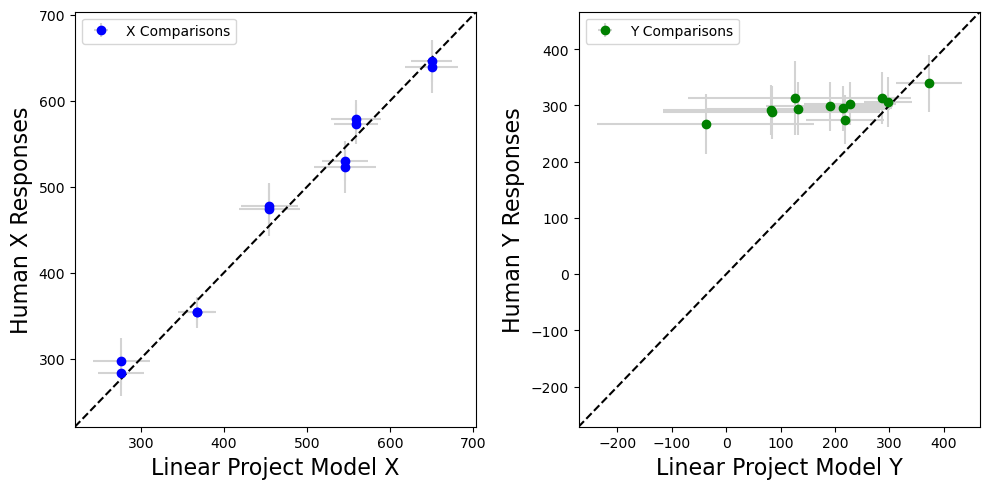

In [97]:
# Obtain data
x_human = df_all.groupby('stimulus_idx')['triangle_final_x_flipback'].mean().values
y_human = df_all.groupby('stimulus_idx')['triangle_final_y'].mean().values
x_model = [intersections_modified[key+1][0] for key in range(12)]
y_model = [intersections_modified[key+1][1] for key in range(12)]

# Assuming some standard deviations for model and human predictions
std_dev_human_x = df_all.groupby('stimulus_idx')['triangle_final_x_flipback'].std().values
std_dev_human_y = df_all.groupby('stimulus_idx')['triangle_final_y'].std().values

# Specify the standard deviation search parameters
start_std_dev = 0.01  # start value for standard deviation
end_std_dev = 200   # end value for standard deviation
num_steps = 500     # number of steps

std_dev_model_x, std_dev_model_y, mle_x_all, mle_y_all = find_best_std_dev_all_condition_1d(df_all, start_std_dev, end_std_dev, num_steps, x_model, y_model)
print(f"Best standard deviation_x: {std_dev_model_x}")
print(f"Best standard deviation_y: {std_dev_model_y}")
print(f"Best average MLE_x: {np.mean(mle_x_all)}")
print(f"Best average MLE_y: {np.mean(mle_y_all)}")

# std_dev_model_x and std_dev_model_y now contain the best standard deviations for each stimulus_idx
plotComparison(x_human, y_human, x_model, y_model, std_dev_human_x, std_dev_human_y, 'Linear Project Model', std_dev_model_x, std_dev_model_y)

In [98]:
find_single_best_std_dev_all_conditions_1d(df_all, start_std_dev, end_std_dev, num_steps, x_model, y_model)

(30.06861723446894, 156.71559118236473, -577.932881094609, -776.9540301832031)

## 2D comparison

In [148]:
from scipy.optimize import minimize
from scipy.stats import multivariate_normal

def calculate_likelihood(data, mean_model, cov_model):
    return -np.sum(multivariate_normal.logpdf(data, mean=mean_model, cov=cov_model))

def likelihood_function(L_params, data, mean):
    # Reconstruct L (lower triangular) from parameters
    L = np.array([[L_params[0], 0], [L_params[1], L_params[2]]])

    # Construct covariance matrix as LL^T
    cov = L @ L.T

    # Calculate negative likelihood (since we are minimizing)
    return -np.sum(multivariate_normal.logpdf(data, mean=mean, cov=cov))

def find_best_covariance(data, mean):
    # Initial guess for L parameters (positive values for diagonal)
    initial_L_params = [1, 0, 1]

    # Run optimization
    result = minimize(likelihood_function, initial_L_params, args=(data, mean))

    # Reconstruct L and covariance matrix from optimized parameters
    L_optimized = np.array([[result.x[0], 0], [result.x[1], result.x[2]]])
    optimized_cov = L_optimized @ L_optimized.T
    return optimized_cov

# Example usage
# True parameters for the normal distribution
true_mean = np.array([50, 50])
true_cov = np.array([[2, 0.5], [0.5, 1]])

# Generate sample data
sample_data = np.random.multivariate_normal(true_mean, true_cov, size=1000)
optimized_covariance = find_best_covariance(sample_data, true_mean)
print(optimized_covariance)

[[2.11664209 0.52953111]
 [0.52953111 0.99890069]]


#### if single covariance matrix that maximizes the sum of the maximum likelihoods calculated per condition

In [106]:
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
import numpy as np

def calculate_total_likelihood(cov_params, all_data, all_means):
    """
    Calculate the total log likelihood for all conditions.
    """
    # Reconstruct the covariance matrix from the parameters
    L = np.array([[cov_params[0], 0], [cov_params[1], cov_params[2]]])
    cov = L @ L.T

    total_likelihood = 0
    for data, mean in zip(all_data, all_means):
        total_likelihood -= np.sum(multivariate_normal.logpdf(data, mean=mean, cov=cov))
    return total_likelihood

def find_single_best_covariance(all_data, all_means):
    # Initial guess for covariance matrix parameters
    initial_cov_params = [1, 0, 1]

    # Run optimization to find the best covariance matrix
    result = minimize(calculate_total_likelihood, initial_cov_params, args=(all_data, all_means))

    # Reconstruct the optimized covariance matrix
    L_optimized = np.array([[result.x[0], 0], [result.x[1], result.x[2]]])
    optimized_cov = L_optimized @ L_optimized.T
    return optimized_cov

# Example usage
# Aggregate data and means for all conditions
# Assuming you have a list of data arrays and corresponding means for each condition
# Example:
# all_data = [data_condition1, data_condition2, ..., data_conditionN]
# all_means = [mean_condition1, mean_condition2, ..., mean_conditionN]

# optimized_covariance = find_best_covariance(all_data, all_means)
# print(optimized_covariance)

In [219]:
sample_data

array([[49.85599096, 50.76998369],
       [50.50078285, 48.69905504],
       [51.05326888, 50.66533525],
       ...,
       [51.5021634 , 50.2346479 ],
       [49.31529421, 49.08716342],
       [50.88605475, 50.62243441]])

In [222]:
xy_positions = np.column_stack((df_all['triangle_final_x_flipback'], df_all['triangle_final_y']))
xy_positions

array([[497.        , 328.00000101],
       [360.00000152, 257.99      ],
       [378.00999982, 228.00999901],
       ...,
       [525.99999332, 330.99      ],
       [544.99000004, 278.00002747],
       [539.99296472, 265.99289333]])

1.0
[322.3, 217.74551669457017]
[[1322.5472451  1802.20758115]
 [1802.20758115 5140.04824761]]
[354.0171203  274.85110324]
[[ 319.23345076   -9.08956222]
 [  -9.08956222 1894.79882094]]
5.0
[500.0, 83.10062259154809]
[[1346797.20695547 2229744.86831333]
 [2229744.86831333 3725456.99644655]]
[473.60709432 292.59497564]
[[ 964.32168116  174.22189946]
 [ 174.22189946 1979.88913236]]
9.0
[604.4000000000001, 126.85299412606867]
[[ 2143.49578417  6337.77883091]
 [ 6337.77883091 39251.94174875]]
[639.64088166 313.8834327 ]
[[ 909.15078256 -255.48165944]
 [-255.48165944 4307.35730572]]
2.0
[322.3, -37.975915638233545]
[[ 1404.91755586 -7627.54784468]
 [-7627.54784468 95907.46397281]]
[296.82610226 267.17674843]
[[ 762.35513607  147.05871975]
 [ 147.05871975 2812.47328902]]
6.0
[500.0, 189.92909825697632]
[[ 1205.16921583 -2118.03057073]
 [-2118.03057073 13552.64156351]]
[477.19271229 298.21814812]
[[ 690.75408866  354.70943231]
 [ 354.70943231 1841.42542302]]
10.0
[604.4000000000001, 215.50214

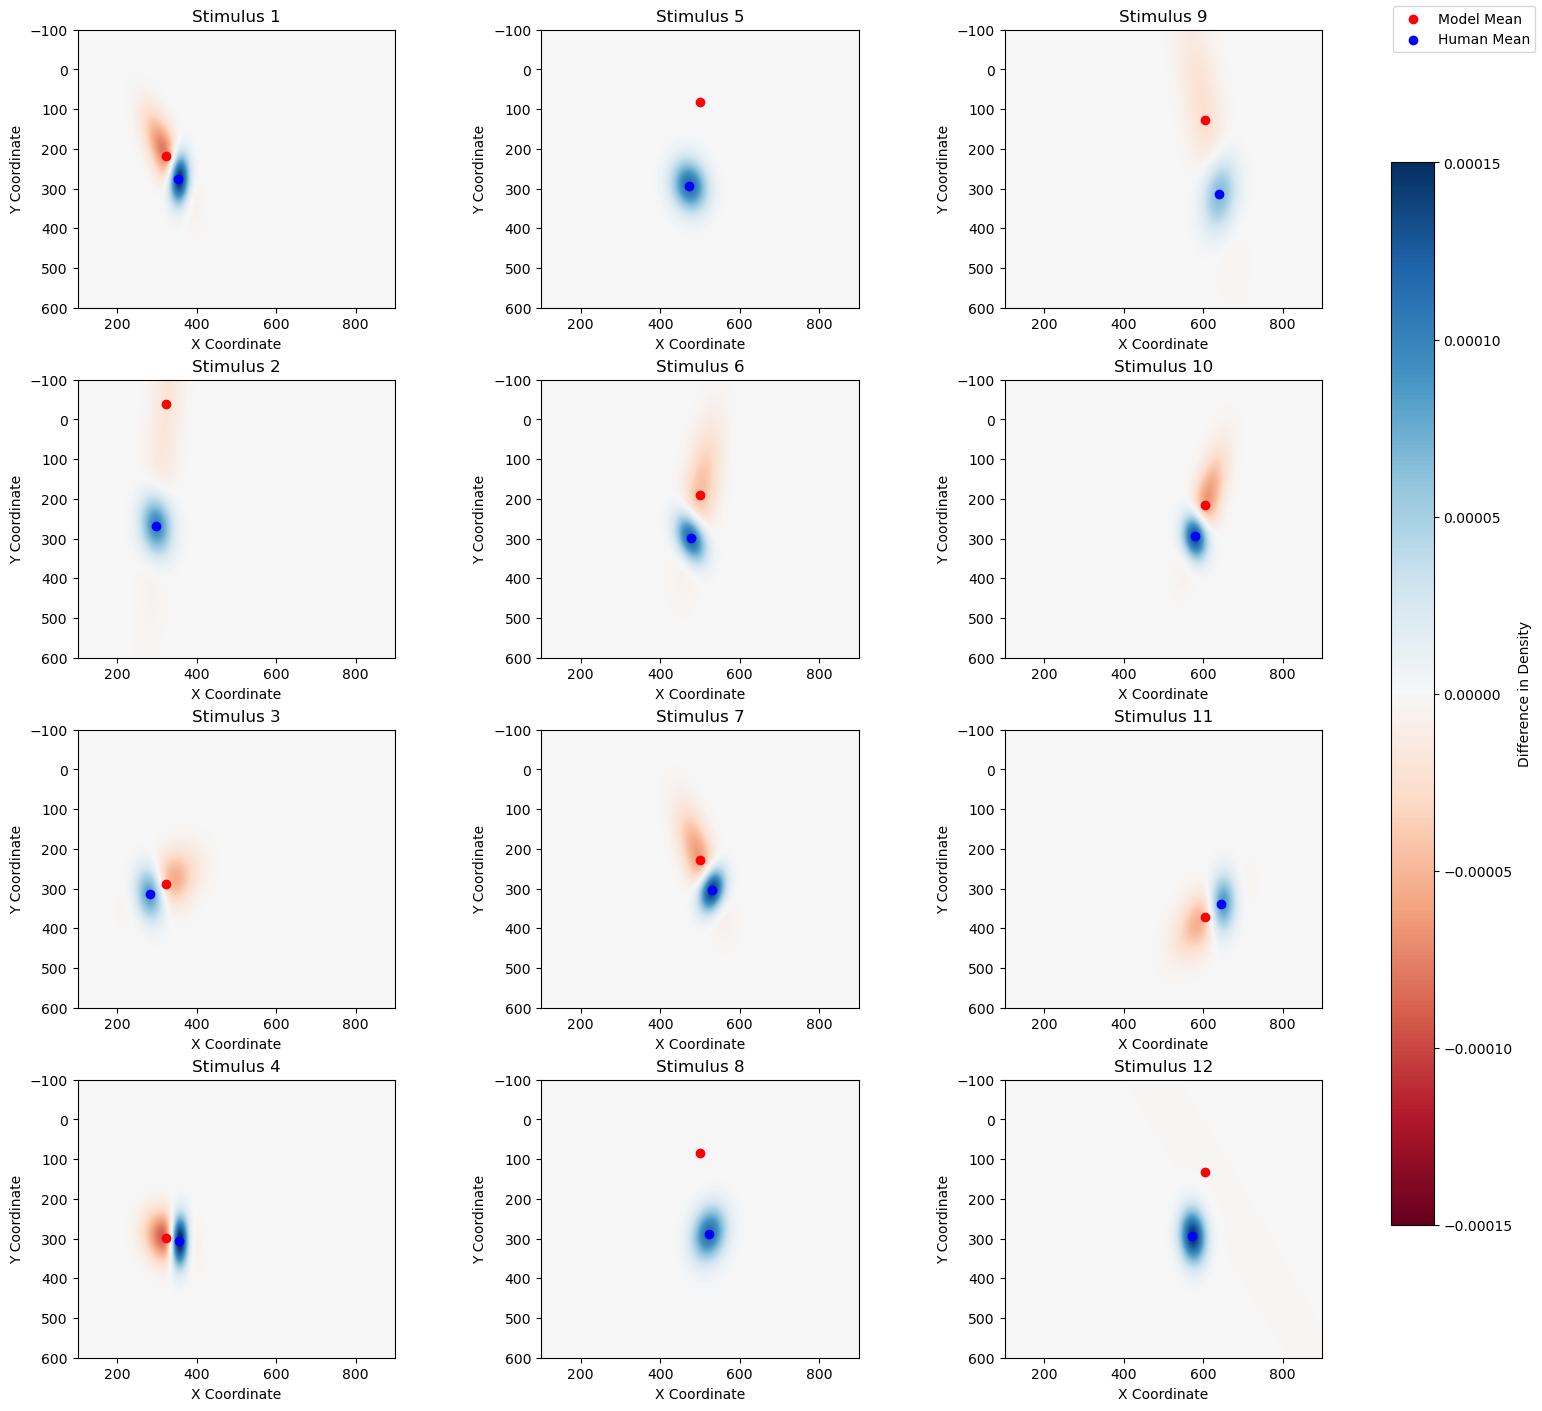

In [268]:
from scipy.stats import multivariate_normal

x_model = [intersections[key+1][0] for key in range(12)]
y_model = [intersections[key+1][1] for key in range(12)]

# x_model = [intersections_modified[key+1][0] for key in range(12)]
# y_model = [intersections_modified[key+1][1] for key in range(12)]

# Creating 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(16, 14), constrained_layout=True)

positions = positions = np.sort(df_all['stimulus_idx'].unique())
positions = positions.reshape((3, 4)).T.flatten()

mle_all = []

for index, position in enumerate(positions):
    ax = axes.flatten()[index]  # Select the current Axes object
    # Filter data for each stimulus_idx
    subset = df_all[df_all['stimulus_idx'] == position]

    # Estimate parameters for the current subset
    mean_model = [x_model[int(position-1)], y_model[int(position-1)]]
    print(position)
    xy_positions = np.column_stack((subset['triangle_final_x_flipback'], subset['triangle_final_y']))
    cov_model = find_best_covariance(xy_positions, np.array(mean_model)) ## find the best-fit 2d parameter
    print(mean_model)
    print(cov_model)
    mean_human = np.mean([subset['triangle_final_x_flipback'], subset['triangle_final_y']], axis=1)
    cov_human = np.cov(subset['triangle_final_x_flipback'], subset['triangle_final_y'])
    print(mean_human)
    print(cov_human)
    
    likelihood = calculate_likelihood(xy_positions, mean_model, cov_model)
    mle_all.append(likelihood)

    # Create 2D Gaussian distributions
    rv_model = multivariate_normal(mean_model, cov_model)
    rv_human = multivariate_normal(mean_human, cov_human)

    # Create a grid of x and y values
    x = np.linspace(100, 900, 1000)
    y = np.linspace(-100, 600, 1000)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Calculate the density values
    density_model = rv_model.pdf(pos)
    density_human = rv_human.pdf(pos)

    # Calculate difference in densities
    density_diff = density_human - density_model

    # Plotting in the current subplot
#     cax = ax.imshow(density_diff, extent=[0, 100, 0, 100], origin='lower', cmap='RdBu', clim=(-0.001, 0.001))
    cax = ax.imshow(density_diff, extent=[100, 900, -100, 600], origin='lower', cmap='RdBu', clim=(-0.00015, 0.00015))
    ax.scatter(*mean_model, color='red', label='Model Mean')
    ax.scatter(*mean_human, color='blue', label='Human Mean')
    ax.set_title(f'Stimulus {int(position)}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.invert_yaxis()

print(f"Best average MLE: {-np.mean(mle_all)}")

# Capture handles for legend (using the last subplot for convenience)
handles, labels = axes[-1, -1].get_legend_handles_labels()
    
# Adding a unified legend to the figure
fig.legend(handles, labels, loc='upper right')

# Adding a colorbar
fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.8, aspect=25, label='Difference in Density')

plt.show()

1.0
[367.766333698683, 217.74551669457017]
[[ 505.61309245 -794.15594967]
 [-794.15594967 5140.03515778]]
[354.0171203  274.85110324]
[[ 319.23345076   -9.08956222]
 [  -9.08956222 1894.79882094]]
5.0
[454.533666301317, 83.10062259154809]
[[ 1320.07248917  4168.4689025 ]
 [ 4168.4689025  45850.32900025]]
[473.60709432 292.59497564]
[[ 964.32168116  174.22189946]
 [ 174.22189946 1979.88913236]]
9.0
[649.8663336986831, 126.85299412606867]
[[ 2625358.38491705  5896991.80572439]
 [ 5896991.80572439 13272448.70964154]]
[639.64088166 313.8834327 ]
[[ 909.15078256 -255.48165944]
 [-255.48165944 4307.35730572]]
2.0
[276.833666301317, -37.975915638233545]
[[ 13381.95922817  79850.00351711]
 [ 79850.00351711 509060.05649359]]
[296.82610226 267.17674843]
[[ 762.35513607  147.05871975]
 [ 147.05871975 2812.47328902]]
6.0
[454.533666301317, 189.92909825697632]
[[ 1198.42527339  2805.46179071]
 [ 2805.46179071 13552.55420102]]
[477.19271229 298.21814812]
[[ 690.75408866  354.70943231]
 [ 354.7094323

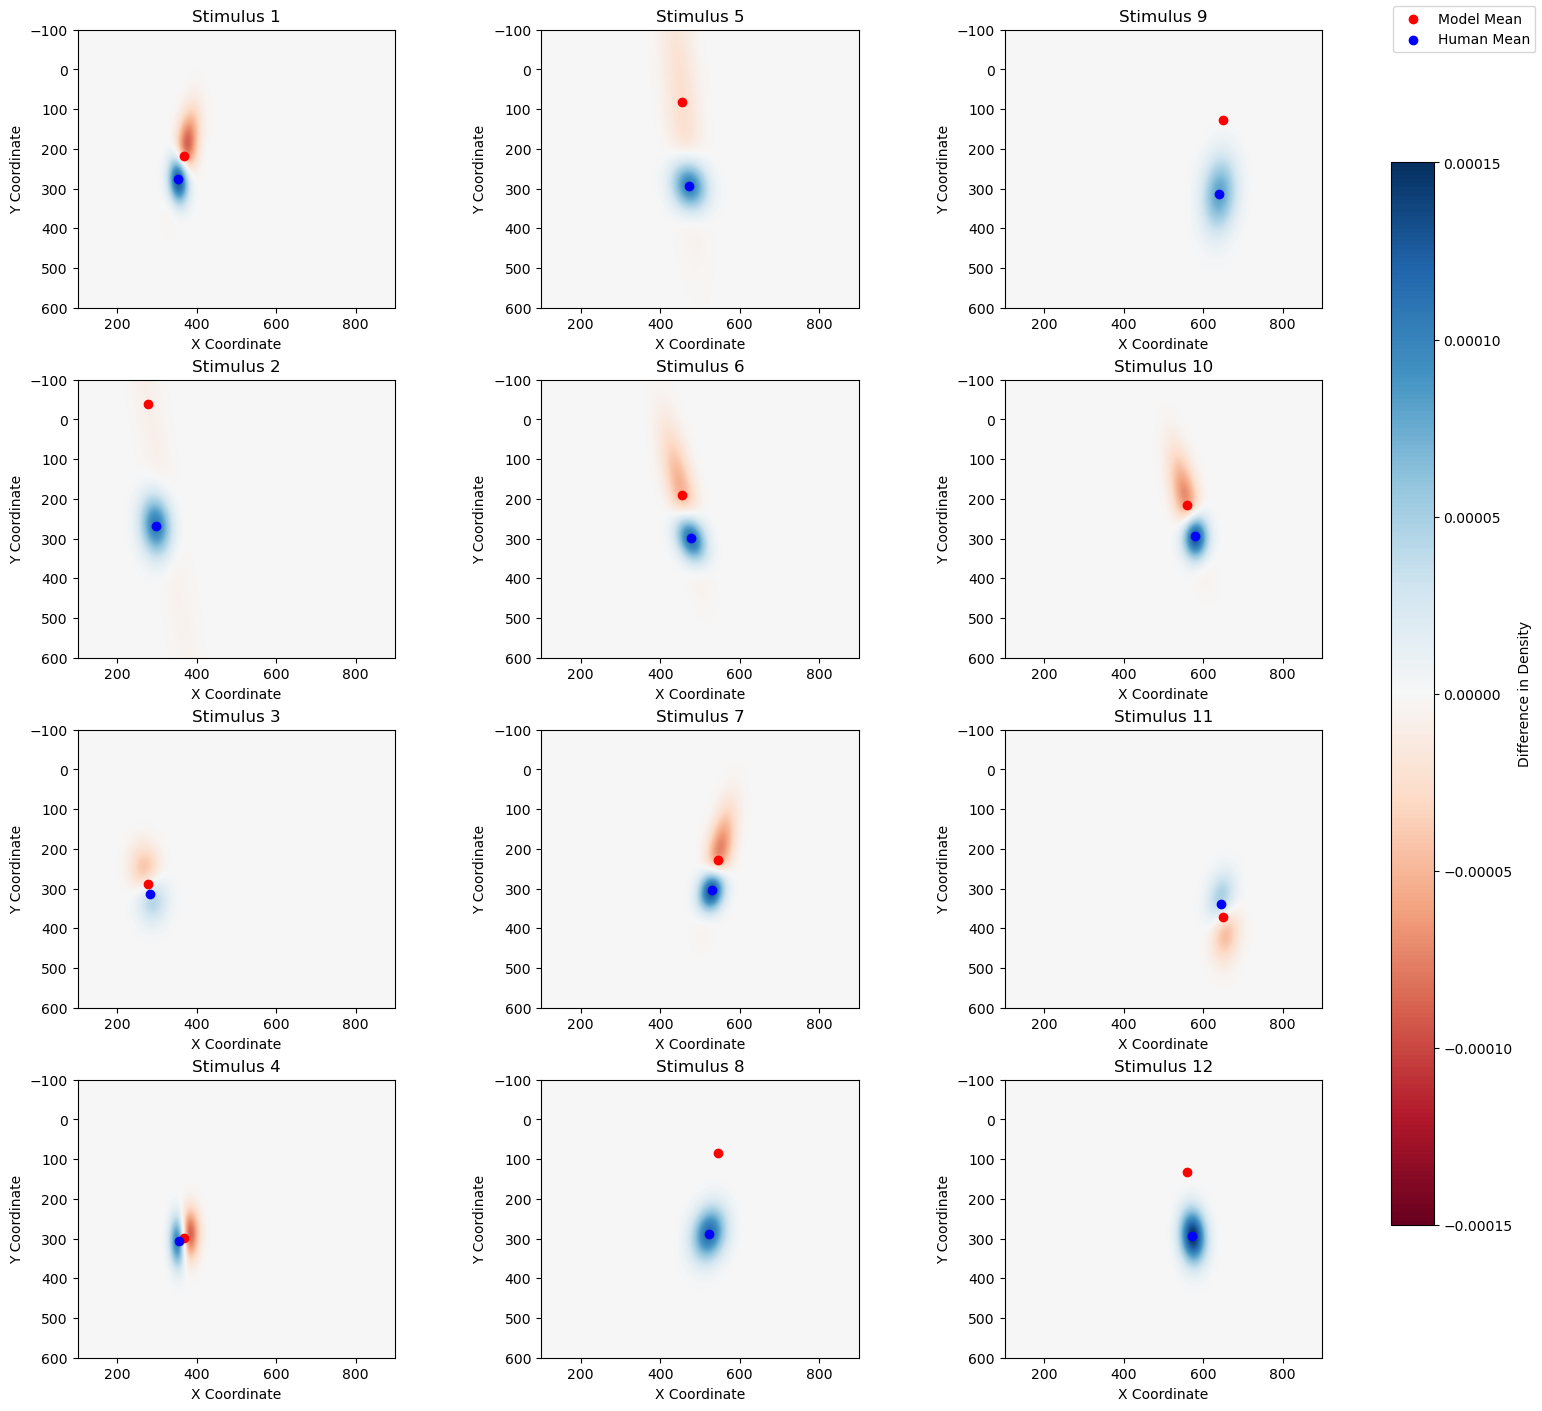

In [108]:
from scipy.stats import multivariate_normal

# x_model = [intersections[key+1][0] for key in range(12)]
# y_model = [intersections[key+1][1] for key in range(12)]

x_model = [intersections_modified[key+1][0] for key in range(12)]
y_model = [intersections_modified[key+1][1] for key in range(12)]

# Creating 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(16, 14), constrained_layout=True)

positions = positions = np.sort(df_all['stimulus_idx'].unique())
positions = positions.reshape((3, 4)).T.flatten()

mle = []

for index, position in enumerate(positions):
    ax = axes.flatten()[index]  # Select the current Axes object
    # Filter data for each stimulus_idx
    subset = df_all[df_all['stimulus_idx'] == position]

    # Estimate parameters for the current subset
    mean_model = [x_model[int(position-1)], y_model[int(position-1)]]
    print(position)
    xy_positions = np.column_stack((subset['triangle_final_x_flipback'], subset['triangle_final_y']))
    cov_model = find_best_covariance(xy_positions, np.array(mean_model)) ## find the best-fit 2d parameter
    print(mean_model)
    print(cov_model)
    mean_human = np.mean([subset['triangle_final_x_flipback'], subset['triangle_final_y']], axis=1)
    cov_human = np.cov(subset['triangle_final_x_flipback'], subset['triangle_final_y'])
    print(mean_human)
    print(cov_human)

    # Create 2D Gaussian distributions
    rv_model = multivariate_normal(mean_model, cov_model)
    rv_human = multivariate_normal(mean_human, cov_human)
    
    likelihood = calculate_likelihood(xy_positions, mean_model, cov_model)
    mle.append(likelihood)

    # Create a grid of x and y values
    x = np.linspace(100, 900, 1000)
    y = np.linspace(-100, 600, 1000)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Calculate the density values
    density_model = rv_model.pdf(pos)
    density_human = rv_human.pdf(pos)

    # Calculate difference in densities
    density_diff = density_human - density_model

    # Plotting in the current subplot
#     cax = ax.imshow(density_diff, extent=[0, 100, 0, 100], origin='lower', cmap='RdBu', clim=(-0.001, 0.001))
    cax = ax.imshow(density_diff, extent=[100, 900, -100, 600], origin='lower', cmap='RdBu', clim=(-0.00015, 0.00015))
    ax.scatter(*mean_model, color='red', label='Model Mean')
    ax.scatter(*mean_human, color='blue', label='Human Mean')
    ax.set_title(f'Stimulus {int(position)}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.invert_yaxis()

print(f"Best average MLE: {-np.mean(mle)}")

# Capture handles for legend (using the last subplot for convenience)
handles, labels = axes[-1, -1].get_legend_handles_labels()
    
# Adding a unified legend to the figure
fig.legend(handles, labels, loc='upper right')

# Adding a colorbar
fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.8, aspect=25, label='Difference in Density')

plt.show()

#### if single covariance matrix that maximizes the sum of the maximum likelihoods calculated per condition

Best average MLE: -1513.8097028293844


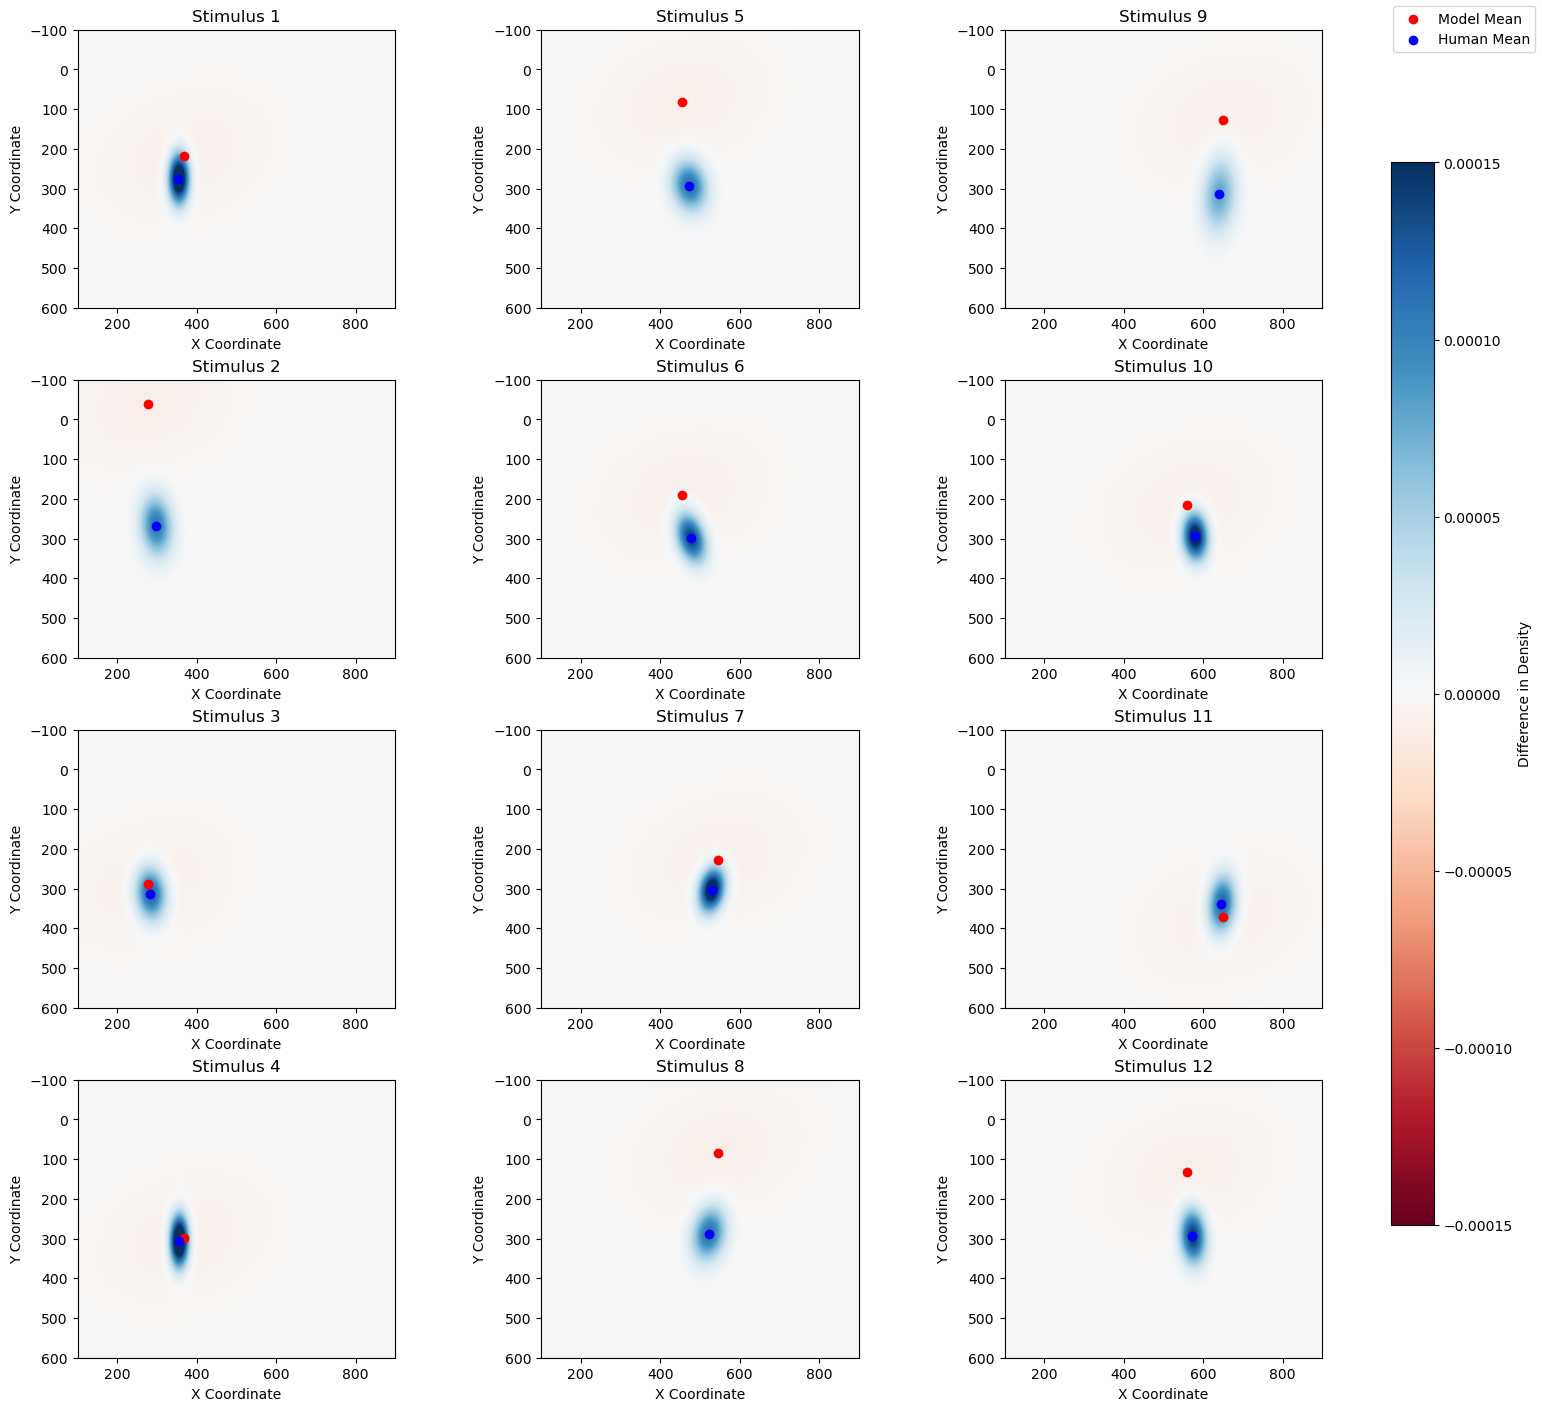

In [149]:
from scipy.stats import multivariate_normal

# x_model = [intersections[key+1][0] for key in range(12)]
# y_model = [intersections[key+1][1] for key in range(12)]

x_model = [intersections_modified[key+1][0] for key in range(12)]
y_model = [intersections_modified[key+1][1] for key in range(12)]

# Creating 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(16, 14), constrained_layout=True)

positions = positions = np.sort(df_all['stimulus_idx'].unique())
positions = positions.reshape((3, 4)).T.flatten()

# Aggregate data from all conditions
all_data = np.vstack([df_all[df_all['stimulus_idx'] == pos][['triangle_final_x_flipback', 'triangle_final_y']].values for pos in positions])

# Mean models for all conditions
all_mean_models = np.array([x_model, y_model]).T

# Find a single best-fit covariance matrix for all conditions
optimized_covariance = find_single_best_covariance(all_data, all_mean_models)

mle_all = []

for index, position in enumerate(positions):
    ax = axes.flatten()[index]
    subset = df_all[df_all['stimulus_idx'] == position]
    mean_model = [x_model[int(position-1)], y_model[int(position-1)]]
    xy_positions = np.column_stack((subset['triangle_final_x_flipback'], subset['triangle_final_y']))

    # Use the same optimized covariance matrix for each condition
    mean_human = np.mean(xy_positions, axis=0)
    rv_model = multivariate_normal(mean_model, optimized_covariance)
    rv_human = multivariate_normal(mean_human, np.cov(xy_positions.T))

    likelihood = calculate_likelihood(xy_positions, mean_model, optimized_covariance)
    mle_all.append(likelihood)

    # Create a grid of x and y values
    x = np.linspace(100, 900, 1000)
    y = np.linspace(-100, 600, 1000)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Calculate the density values
    density_model = rv_model.pdf(pos)
    density_human = rv_human.pdf(pos)

    # Calculate difference in densities
    density_diff = density_human - density_model

    # Plotting in the current subplot
#     cax = ax.imshow(density_diff, extent=[0, 100, 0, 100], origin='lower', cmap='RdBu', clim=(-0.001, 0.001))
    cax = ax.imshow(density_diff, extent=[100, 900, -100, 600], origin='lower', cmap='RdBu', clim=(-0.00015, 0.00015))
    ax.scatter(*mean_model, color='red', label='Model Mean')
    ax.scatter(*mean_human, color='blue', label='Human Mean')
    ax.set_title(f'Stimulus {int(position)}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.invert_yaxis()

print(f"Best average MLE: {-np.mean(mle_all)}")

# Capture handles for legend (using the last subplot for convenience)
handles, labels = axes[-1, -1].get_legend_handles_labels()
    
# Adding a unified legend to the figure
fig.legend(handles, labels, loc='upper right')

# Adding a colorbar
fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.8, aspect=25, label='Difference in Density')

plt.show()

In [153]:
all_data.shape

(1440, 2)

## Get MLE for this model

# (2) Linear projection followed by refinement with a physics engine. 

The basic idea is that you initialize the triangle location at the linear projection hypothesis, then run a simulation to see where the ball goes. Depending on whether it's above or below the exit point, adjust the triangle up or down along the linear vertical path from the initial ball position. The parameters here would be the size of the increment and the stopping criterion (number of increments or some error threshold). It would be easier (as a start) to use a deterministic model (no noise, as in Kevin's model).

**? If we could set the size of the increment to be very small and the stopping criterion to be harsh (small error threshold), then what is its different between this increment + simulation method versus finding a best location along the path?**

